In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use("ggplot")

In [7]:
import pandas as pd
import numpy as np

## 4.3 데이터 내려받기

In [8]:
import random
np.random.seed(1234)
random.seed(1234)

In [9]:
train_df = pd.read_csv("../Data/house_price_data/train.csv")
test_df = pd.read_csv("../Data/house_price_data/test.csv")
submission = pd.read_csv("../Data/house_price_data/sample_submission.csv")

In [10]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 4.4 벤치마크용 베이스라인 생성

In [11]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [12]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [13]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [14]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [15]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [18]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")
    

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [19]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [20]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [21]:
import lightgbm as lgb

In [22]:
from sklearn.model_selection import KFold

folds = 3
kf = KFold(n_splits=folds)

In [24]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234,
}

In [25]:
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df_le["SalePrice"]

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data: 973, number of used features: 72
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.59541e+09
[20]	valid_0's l2: 7.467e+08
[30]	valid_0's l2: 5.96558e+08
[40]	valid_0's l2: 5.49479e+08
[50]	valid_0's l2: 5.29299e+08
[60]	valid_0's l2: 5.28785e+08
[70]	valid_0's l2: 5.32577e+08
Early stopping, best iteration is:
[57]	valid_0's l2: 5.26368e+08
0.12637668452645173
[LightGBM] [Info] Total Bins 2954
[LightGBM] [Info] Number of data: 973, number of used features: 72
[LightGBM] [Info] Start training from score 180923.739979
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.08125e+09
[20]	valid_0's l2: 1.23117e+09
[30]	valid_0's l2: 1.04155e+09
[40]	valid_0's l2: 9.92123e+08
[50]	valid_0's l2: 9.69222e+08
[60]	valid_0's l2: 9.54807e+08
[70]	valid_0's l2: 9.50536e+08
[80]	valid_0's l2: 9.45353e+08
[90]	valid_

In [28]:
from statistics import mean

result = []

result.append(mean(rmses))
print(result)

[0.13697846250952908]


In [29]:
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof 
    })

<Axes: >

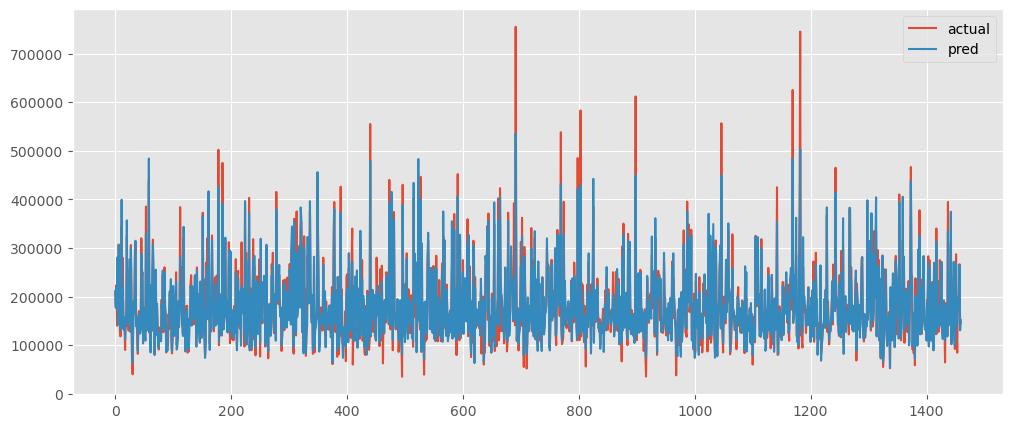

In [30]:
actual_pred_df.plot(figsize=(12,5))

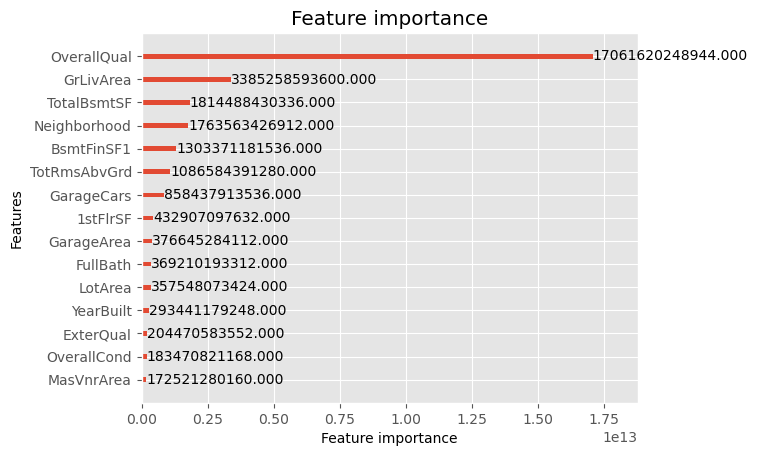

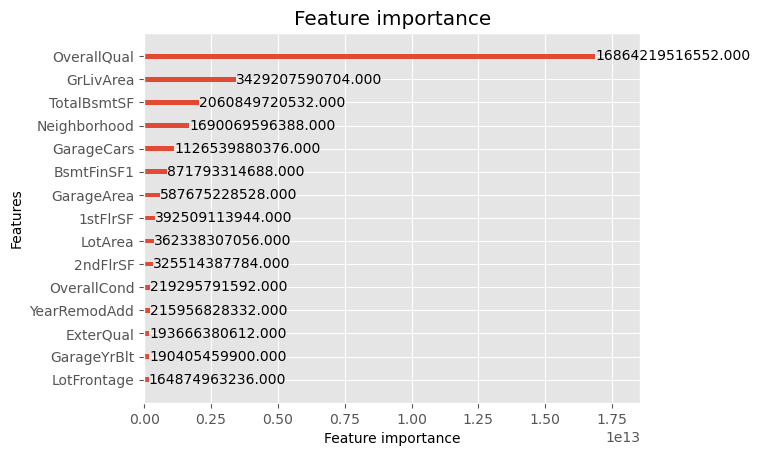

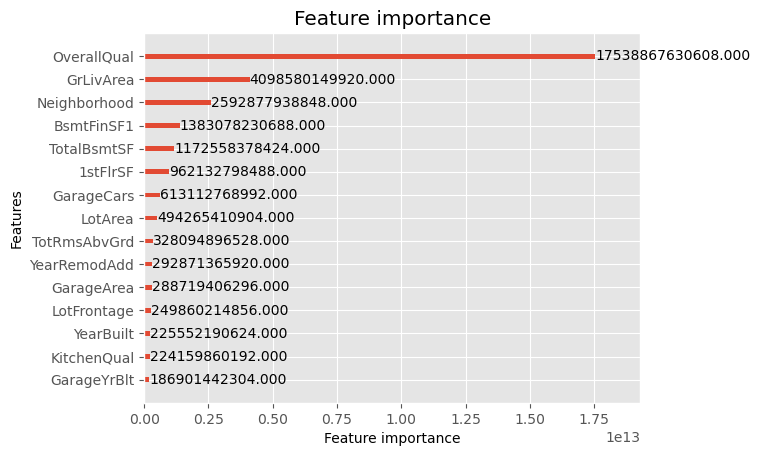

In [31]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

## 4.5 목전 변수의 전처리: 목적 변수의 분포확인

In [32]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

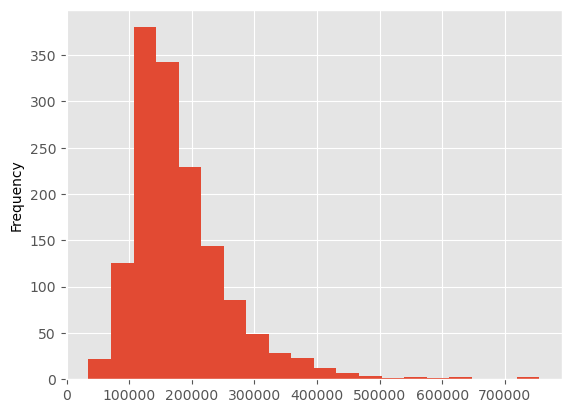

In [33]:
train_df["SalePrice"].plot.hist(bins=20)

In [34]:
np.log(train_df["SalePrice"])


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

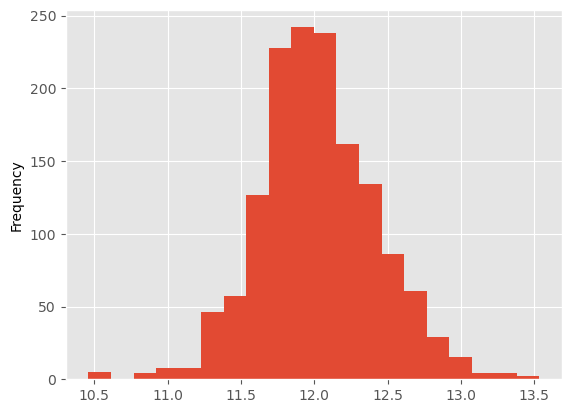

In [35]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [36]:
pd.options.mode.chained_assignment = None
train_df_le["SalePrice_log"] = np.log(train_df["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [37]:
import warnings
warnings.filterwarnings("ignore")

models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 3186
[LightGBM] [Info] Number of data: 973, number of used features: 73
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0437319
[20]	valid_0's l2: 0.0218224
[30]	valid_0's l2: 0.0173973
[40]	valid_0's l2: 0.0162261
[50]	valid_0's l2: 0.0160633
[60]	valid_0's l2: 0.0159648
[70]	valid_0's l2: 0.0158675
[80]	valid_0's l2: 0.0158977
Early stopping, best iteration is:
[63]	valid_0's l2: 0.0158347
0.12582193205915593
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data: 973, number of used features: 73
[LightGBM] [Info] Start training from score 12.025976
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0479628
[20]	valid_0's l2: 0.0273225
[30]	valid_0's l2: 0.0227591
[40]	valid_0's l2: 0.0214748
[50]	valid_0's l2: 0.0209623
[60]	valid_0's l2: 0.0207613
[70]	valid_0's l2: 0.0207134
[80]	valid_0's l2: 0.0206873
[90]	valid_0's l2: 0

In [38]:
result.append(sum(rmses)/len(rmses))

print(result)


[0.13697846250952908, 0.13321288683430332]


## 4.6 설명 변수의 전처리 : 결측치 확인

In [39]:
all_df = pd.concat([train_df, test_df,], sort=False).reset_index(drop=True)

In [40]:
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [41]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

In [42]:
all_df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [43]:
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0

In [44]:
all_df.PoolQC.value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [45]:
all_df.loc[~all_df["MiscFeature"].isnull(), "MiscFeature"] = 1
all_df.loc[all_df["MiscFeature"].isnull(), "MiscFeature"] = 0

In [46]:
all_df.loc[~all_df["Alley"].isnull(), "Alley"] = 1
all_df.loc[all_df["Alley"].isnull(), "Alley"] = 0

In [47]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [48]:
all_df["hasHighFacility"] =all_df["hasHighFacility"].astype(int)

In [49]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

In [50]:
all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis=1)

## 4.7 이상치 제외

In [51]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [52]:
train_df_num = train_df.select_dtypes(include=[np.number])

In [53]:
nonratio_features = ['id', 'MSSubClass', 'OverallCond', 'YearBuilt', 'MoSold', 'YrSold']

In [54]:
num_features = sorted(list(set(train_df_num)-set(nonratio_features)))

In [55]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearRemodAdd']

In [56]:
train_df_num_rs = train_df_num[num_features] 

In [57]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col]==0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [58]:
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
OverallQual 10
PoolArea 8
TotRmsAbvGrd 12


In [59]:
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) | \
    (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)] 

    print(col, len(tmp_df))
    

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
Id 0
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
OverallQual 2
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22
YearRemodAdd 0


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

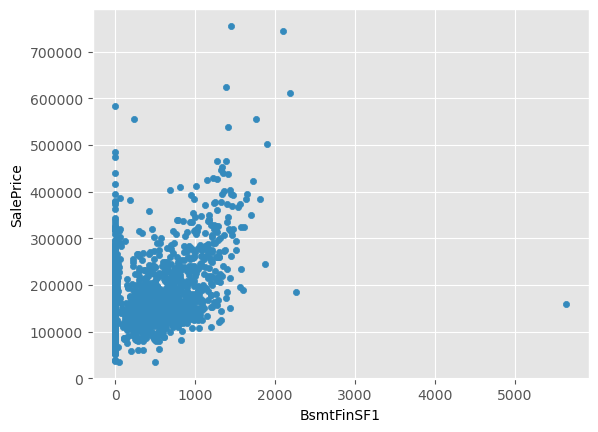

In [60]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [61]:
all_df[all_df["TotalBsmtSF"] > 5000]#[["TotalBsmtSF", "SalePrice"]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

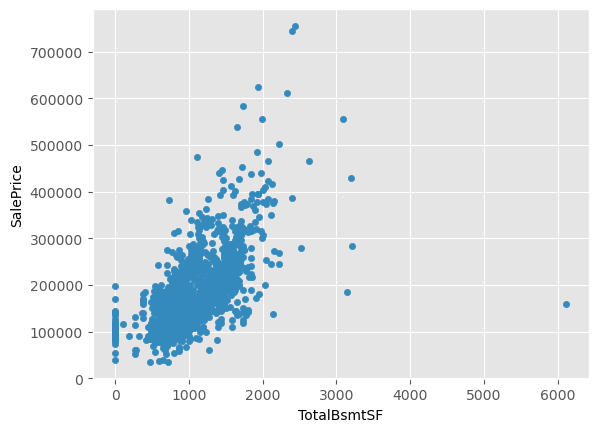

In [62]:
all_df.plot.scatter(x="TotalBsmtSF", y='SalePrice')

In [63]:
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

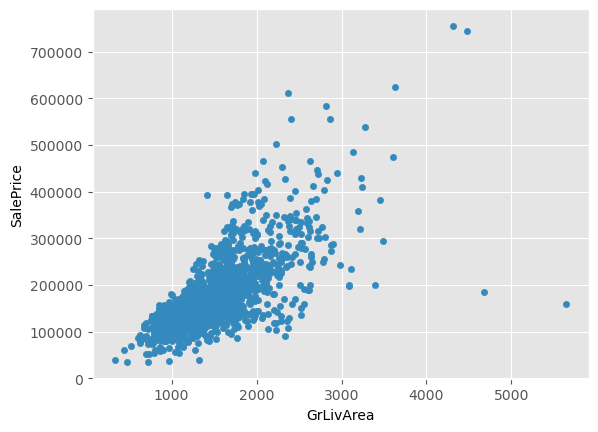

In [64]:
all_df.plot.scatter(x='GrLivArea', y='SalePrice')

In [65]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

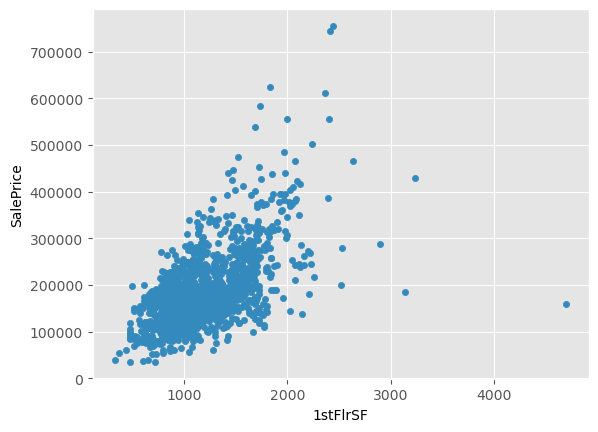

In [66]:
all_df.plot.scatter(x="1stFlrSF", y='SalePrice')

In [67]:
all_df[all_df['1stFlrSF'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


In [68]:
all_df = all_df[(all_df["BsmtFinSF1"] < 2000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["TotalBsmtSF"] < 3000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["GrLivArea"] < 4500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["1stFlrSF"] < 2500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["LotArea"] < 10000) | (all_df["SalePrice"].isnull())]

In [69]:
categories = categories.drop(["PoolQC", 'MiscFeature', 'Alley'])

In [70]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [71]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [72]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data: 557, number of used features: 69
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0344771
[Ligh

In [73]:
result.append(sum(rmses) / len(rmses))


In [74]:
print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842]


## 4.8 설명 변수 확인 : 특징 값 생성

In [75]:
all_df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2295.000000,2295.000000,2150.000000,2295.000000
mean,1970.213072,1983.442702,1977.384186,2007.800871
std,30.605719,21.271568,26.175435,1.309545
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1951.000000,1963.000000,1959.000000,2007.000000
50%,1972.000000,1992.000000,1979.000000,2008.000000
75%,2000.000000,2003.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [76]:
all_df['Age'] = all_df['YrSold'] - all_df['YearBuilt']
# all_df = all_df.drop(['YrSold', 'YearBuilt'], axis=1)
# all_df['GarageAge'] = all_df['YrSold'] - all_df['GarageYrBlt']

In [77]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [78]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data: 557, number of used features: 70
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0352187
[Ligh

In [79]:
result.append(sum(rmses) / len(rmses))

print(result)



[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337]


In [80]:
all_df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LotFrontage']].describe()

,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2295.000000,2276.000000,2294.000000,2295.000000,2295.00000,2295.000000,2295.000000,2294.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,1950.000000
mean,8889.566449,90.452109,545.081953,1112.132462,315.40610,4.154248,1431.692810,450.726678,86.973856,44.905882,24.190850,1.781699,14.704575,1.359913,65.688718
std,4346.447797,167.087651,423.944232,367.247419,408.65849,44.022550,462.137246,211.210886,121.853336,65.620297,64.978993,19.190070,52.125576,27.122480,21.007830
min,1300.000000,0.000000,0.000000,334.000000,0.00000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7000.000000,0.000000,216.000000,858.500000,0.00000,0.000000,1092.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
50%,8688.000000,0.000000,460.000000,1043.000000,0.00000,0.000000,1374.000000,460.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,65.000000
75%,10167.000000,142.000000,785.000000,1326.500000,672.00000,0.000000,1668.000000,572.000000,159.000000,65.000000,0.000000,0.000000,0.000000,0.000000,76.000000
max,56600.000000,1600.000000,2140.000000,5095.000000,1862.00000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,200.000000


In [81]:
all_df["TotalSF"] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] +all_df['2ndFlrSF']
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df['HalfBath'] + all_df['BsmtFullBath'] + all_df['BsmtHalfBath']

In [82]:
all_df['Total_PorchSF'] = all_df['WoodDeckSF'] +all_df['OpenPorchSF'] + all_df['EnclosedPorch'] + all_df['3SsnPorch'] + all_df['ScreenPorch']


In [83]:
all_df['hasPorch'] = all_df['Total_PorchSF'].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop('Total_PorchSF', axis=1)

In [84]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [85]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data: 557, number of used features: 73
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0339167
[Ligh

In [86]:
result.append(sum(rmses)/len(rmses))
print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337, 0.13127460288065507]


## 4.9 하이퍼파라미터 최적화

In [87]:
import optuna

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [90]:
def objective(trial):
    params = {
        "objective":"regression",
        "random_seed":1234,
        "learnign_rate":0.05,
        "n_estimator":1000,
        "num_leaves":trial.suggest_int("num_leaves", 4, 64),
        "max_bin":trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction":trial.suggest_uniform("bagging_fraction", 0.4, 0.9),
        "bagging_freq":trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction":trial.suggest_uniform("feature_fraction", 0.4, 0.9),
        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf":trial.suggest_int("min_sum_hessian_in_leaf", 1, 10)
    }
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10
                        )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    return score

In [91]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2023-06-06 22:03:41,970] Trial 0 finished with value: 0.1202822720661343 and parameters: {'num_leaves': 48, 'max_bin': 97, 'bagging_fraction': 0.7575946831862097, 'bagging_freq': 4, 'feature_fraction': 0.8289728088113784, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.1202822720661343.
[I 2023-06-06 22:03:42,037] Trial 1 finished with value: 0.12507785751775552 and parameters: {'num_leaves': 23, 'max_bin': 71, 'bagging_fraction': 0.5921908536463499, 'bagging_freq': 8, 'feature_fraction': 0.8458865003910399, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 0 with value: 0.1202822720661343.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1883
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2023-06-06 22:03:42,113] Trial 2 finished with value: 0.12338418563605398 and parameters: {'num_leaves': 42, 'max_bin': 89, 'bagging_fraction': 0.6644474598764523, 'bagging_freq': 9, 'feature_fraction': 0.5963923980504149, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 0 with value: 0.1202822720661343.
[I 2023-06-06 22:03:42,165] Trial 3 finished with value: 0.13423187368312012 and parameters: {'num_leaves': 13, 'max_bin': 198, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 4, 'feature_fraction': 0.8785775794765232, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 0 with value: 0.1202822720661343.
[I 2023-06-06 22:03:42,254] Trial 4 finished with value: 0.1234779011371242 and parameters: {'num_leaves': 39, 'max_bin': 79, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 8, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.1202822720661343.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l2: 0.0156101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l2: 0.0161152
Early stopping, best iteration is:
[60]	valid_0's l2: 0.0152237
[LightGBM] [Warning] Unknown parameter: n_estimator
[

[I 2023-06-06 22:03:42,317] Trial 5 finished with value: 0.1221013070131322 and parameters: {'num_leaves': 36, 'max_bin': 81, 'bagging_fraction': 0.4529538035938961, 'bagging_freq': 8, 'feature_fraction': 0.5322778060523135, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 3}. Best is trial 0 with value: 0.1202822720661343.
[I 2023-06-06 22:03:42,426] Trial 6 finished with value: 0.11800815775184502 and parameters: {'num_leaves': 59, 'max_bin': 78, 'bagging_fraction': 0.6842169744343243, 'bagging_freq': 1, 'feature_fraction': 0.5620705038966071, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 7}. Best is trial 6 with value: 0.11800815775184502.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l2: 0.0151157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-06 22:03:42,507] Trial 7 finished with value: 0.11978675724750461 and parameters: {'num_leaves': 44, 'max_bin': 67, 'bagging_fraction': 0.8718740392573121, 'bagging_freq': 10, 'feature_fraction': 0.6249749949556138, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-06 22:03:42,554] Trial 8 finished with value: 0.12527369919696565 and parameters: {'num_leaves': 5, 'max_bin': 107, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 8, 'feature_fraction': 0.4854547925680226, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-06 22:03:42,619] Trial 9 finished with value: 0.12701484611714114 and parameters: {'num_leaves': 18, 'max_bin': 149, 'bagging_fraction': 0.5818553854713113, 'bagging_freq': 10, 'feature_fraction': 0.4192127132363674, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1974
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0375538
[20]	valid_0's l2: 0.0246261
[30]	valid_0's l2: 0.020736
[40]	valid_0's l2: 0.0187841
[50]	valid_0's l2: 0.0171657
[60]	valid_0's l2: 0.0169389
[70]	valid_0's l2: 0.0165887
[80]	valid_0's l2: 0.016125
[90]	valid_0's l2: 0.0158985
[100]	valid_0's l2: 0.0157395
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0156935
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign

[I 2023-06-06 22:03:42,723] Trial 11 finished with value: 0.12642141289998135 and parameters: {'num_leaves': 18, 'max_bin': 193, 'bagging_fraction': 0.6373487511442064, 'bagging_freq': 8, 'feature_fraction': 0.5690038074194459, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-06 22:03:42,797] Trial 12 finished with value: 0.1275805638201466 and parameters: {'num_leaves': 52, 'max_bin': 99, 'bagging_fraction': 0.7891727410129545, 'bagging_freq': 4, 'feature_fraction': 0.5843625853304821, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-06 22:03:42,855] Trial 13 finished with value: 0.1207070769609134 and parameters: {'num_leaves': 53, 'max_bin': 86, 'bagging_fraction': 0.44804920394698156, 'bagging_freq': 4, 'feature_fraction': 0.6343256008238508, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-0

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0284579
[20]	valid_0's l2: 0.0177297
[30]	valid_0's l2: 0.0163731
[40]	valid_0's l2: 0.0163973
[50]	valid_0's l2: 0.0164432
[60]	valid_0's l2: 0.0163543
Early stopping, best iteration is:
[44]	valid_0's l2: 0.0162768
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info

[I 2023-06-06 22:03:43,321] Trial 15 finished with value: 0.13101296680213848 and parameters: {'num_leaves': 63, 'max_bin': 180, 'bagging_fraction': 0.7443305914028853, 'bagging_freq': 4, 'feature_fraction': 0.8591177331810724, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 3}. Best is trial 6 with value: 0.11800815775184502.


[30]	valid_0's l2: 0.0175244
[40]	valid_0's l2: 0.0174357
[50]	valid_0's l2: 0.0172594
[60]	valid_0's l2: 0.0172883
[70]	valid_0's l2: 0.0172074
[80]	valid_0's l2: 0.0173473
Early stopping, best iteration is:
[69]	valid_0's l2: 0.0171644
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2023-06-06 22:03:43,423] Trial 16 finished with value: 0.12842468420094405 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.5326947454697227, 'bagging_freq': 10, 'feature_fraction': 0.8605788051185999, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 7}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-06 22:03:43,504] Trial 17 finished with value: 0.12671267291596205 and parameters: {'num_leaves': 47, 'max_bin': 154, 'bagging_fraction': 0.7337051899818409, 'bagging_freq': 4, 'feature_fraction': 0.7235870700937778, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-06 22:03:43,564] Trial 18 finished with value: 0.12452148434743991 and parameters: {'num_leaves': 42, 'max_bin': 69, 'bagging_fraction': 0.5989103763793145, 'bagging_freq': 4, 'feature_fraction': 0.4100537730937468, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 6 with value: 0.11800815775184502.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l2: 0.0168605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-06 22:03:43,609] Trial 19 finished with value: 0.11742714544104153 and parameters: {'num_leaves': 6, 'max_bin': 53, 'bagging_fraction': 0.7518686396449581, 'bagging_freq': 1, 'feature_fraction': 0.5243765717599791, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11742714544104153.
[I 2023-06-06 22:03:43,663] Trial 20 finished with value: 0.12192224938875965 and parameters: {'num_leaves': 30, 'max_bin': 117, 'bagging_fraction': 0.8763745057584925, 'bagging_freq': 1, 'feature_fraction': 0.8232043362355639, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11742714544104153.
[I 2023-06-06 22:03:43,726] Trial 21 finished with value: 0.11976023108610309 and parameters: {'num_leaves': 17, 'max_bin': 171, 'bagging_fraction': 0.5982528704234924, 'bagging_freq': 9, 'feature_fraction': 0.5248981378274891, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0345151
[20]	valid_0's l2: 0.019836
[30]	valid_0's l2: 0.0165823
[40]	valid_0's l2: 0.0151201
[50]	valid_0's l2: 0.0144154
[60]	valid_0's l2: 0.0140772
[70]	valid_0's l2: 0.014002
[80]	valid_0's l2: 0.0140364
[90]	valid_0's l2: 0.013829
[100]	valid_0's l2: 0.0138246
Did not meet early stopping. Best iteration is:
[88]	valid_0's l2: 0.0137891
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data: 668, number of used features: 74
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_

[I 2023-06-06 22:03:43,803] Trial 22 finished with value: 0.12187967702419235 and parameters: {'num_leaves': 50, 'max_bin': 75, 'bagging_fraction': 0.6942325425343747, 'bagging_freq': 10, 'feature_fraction': 0.6506621909633512, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.11742714544104153.
[I 2023-06-06 22:03:43,871] Trial 23 finished with value: 0.12479694125927085 and parameters: {'num_leaves': 37, 'max_bin': 154, 'bagging_fraction': 0.6119275242790898, 'bagging_freq': 10, 'feature_fraction': 0.6350660946278825, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.11742714544104153.
[I 2023-06-06 22:03:43,949] Trial 24 finished with value: 0.1221783148006888 and parameters: {'num_leaves': 60, 'max_bin': 129, 'bagging_fraction': 0.7745849185763624, 'bagging_freq': 9, 'feature_fraction': 0.46773703211122514, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l2: 0.0151544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[75]	valid_0's l2: 0.0148547
[LightG

[I 2023-06-06 22:03:44,011] Trial 25 finished with value: 0.12478790495313113 and parameters: {'num_leaves': 51, 'max_bin': 143, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 7, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11742714544104153.
[I 2023-06-06 22:03:44,055] Trial 26 finished with value: 0.12586705241856302 and parameters: {'num_leaves': 7, 'max_bin': 53, 'bagging_fraction': 0.5837809350239482, 'bagging_freq': 7, 'feature_fraction': 0.8920211206820732, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11742714544104153.
[I 2023-06-06 22:03:44,118] Trial 27 finished with value: 0.11601166265138267 and parameters: {'num_leaves': 27, 'max_bin': 93, 'bagging_fraction': 0.4501134436561506, 'bagging_freq': 9, 'feature_fraction': 0.5761558306002665, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 6}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's l2: 0.0157098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-06 22:03:44,192] Trial 28 finished with value: 0.12297220686848548 and parameters: {'num_leaves': 32, 'max_bin': 161, 'bagging_fraction': 0.41877969191407016, 'bagging_freq': 4, 'feature_fraction': 0.48342375652424985, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:44,273] Trial 29 finished with value: 0.12350343734181911 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.6056983618777273, 'bagging_freq': 4, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:44,357] Trial 30 finished with value: 0.12000726140169456 and parameters: {'num_leaves': 45, 'max_bin': 181, 'bagging_fraction': 0.6100376848953053, 'bagging_freq': 3, 'feature_fraction': 0.8331911629643146, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2023-06-06 22:03:44,452] Trial 31 finished with value: 0.12590689941435362 and parameters: {'num_leaves': 43, 'max_bin': 111, 'bagging_fraction': 0.7649952812120291, 'bagging_freq': 3, 'feature_fraction': 0.6605183031020647, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 6}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:44,569] Trial 32 finished with value: 0.12250866737276142 and parameters: {'num_leaves': 44, 'max_bin': 86, 'bagging_fraction': 0.48549329934156576, 'bagging_freq': 3, 'feature_fraction': 0.5119623440301901, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.


[40]	valid_0's l2: 0.0162076
[50]	valid_0's l2: 0.0160032
[60]	valid_0's l2: 0.0160519
[70]	valid_0's l2: 0.0158727
[80]	valid_0's l2: 0.0159402
Early stopping, best iteration is:
[64]	valid_0's l2: 0.0158525
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1755
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-06-06 22:03:44,625] Trial 33 finished with value: 0.12254508601789275 and parameters: {'num_leaves': 12, 'max_bin': 179, 'bagging_fraction': 0.7918221226509443, 'bagging_freq': 4, 'feature_fraction': 0.7107392007498818, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 5}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:44,703] Trial 34 finished with value: 0.12106479723417404 and parameters: {'num_leaves': 40, 'max_bin': 75, 'bagging_fraction': 0.5336312689407392, 'bagging_freq': 4, 'feature_fraction': 0.8321407213431223, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 2}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:44,782] Trial 35 finished with value: 0.11991474508709803 and parameters: {'num_leaves': 37, 'max_bin': 196, 'bagging_fraction': 0.6771212175422201, 'bagging_freq': 5, 'feature_fraction': 0.5049218744875611, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 27 with value: 0.11601166265138267.


[70]	valid_0's l2: 0.015137
[80]	valid_0's l2: 0.0154983
Early stopping, best iteration is:
[64]	valid_0's l2: 0.0150173
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data: 668, number of used features: 74
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2023-06-06 22:03:44,845] Trial 36 finished with value: 0.12351686664900818 and parameters: {'num_leaves': 16, 'max_bin': 94, 'bagging_fraction': 0.7697753975246437, 'bagging_freq': 3, 'feature_fraction': 0.8851183415480504, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:44,916] Trial 37 finished with value: 0.12409362478042726 and parameters: {'num_leaves': 43, 'max_bin': 200, 'bagging_fraction': 0.6172083127790604, 'bagging_freq': 7, 'feature_fraction': 0.8405022811008375, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,007] Trial 38 finished with value: 0.127089136669303 and parameters: {'num_leaves': 53, 'max_bin': 91, 'bagging_fraction': 0.41233936419566564, 'bagging_freq': 6, 'feature_fraction': 0.771917272654894, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.


[30]	valid_0's l2: 0.0163039
[40]	valid_0's l2: 0.0156832
[50]	valid_0's l2: 0.0156076
[60]	valid_0's l2: 0.0157512
[70]	valid_0's l2: 0.0152981
[80]	valid_0's l2: 0.0154441
Early stopping, best iteration is:
[69]	valid_0's l2: 0.0152564
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data: 668, number of used features: 74
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2023-06-06 22:03:45,125] Trial 39 finished with value: 0.1279703083906129 and parameters: {'num_leaves': 31, 'max_bin': 123, 'bagging_fraction': 0.7035225305582258, 'bagging_freq': 2, 'feature_fraction': 0.8951694736983522, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,179] Trial 40 finished with value: 0.12211672222673099 and parameters: {'num_leaves': 20, 'max_bin': 156, 'bagging_fraction': 0.4686102100485973, 'bagging_freq': 9, 'feature_fraction': 0.7791893269180707, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2106
[LightGBM] [Info] Number of data: 668, number of used features: 79
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0296357
[20]	valid_0's l2: 0.0187327
[30]	valid_0's l2: 0.0167038
[40]	valid_0's l2: 0.0166196
[50]	valid_0's l2: 0.0164891
[60]	valid_0's l2: 0.0167254
[70]	valid_0's l2: 0.0166564
Early stopping, best iteration is:
[54]	valid_0's l2: 0.0163764
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter:

[I 2023-06-06 22:03:45,228] Trial 41 finished with value: 0.12579856677639664 and parameters: {'num_leaves': 12, 'max_bin': 141, 'bagging_fraction': 0.5623414860332328, 'bagging_freq': 8, 'feature_fraction': 0.4000276784325043, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,304] Trial 42 finished with value: 0.12210483043464902 and parameters: {'num_leaves': 27, 'max_bin': 63, 'bagging_fraction': 0.8426688298047929, 'bagging_freq': 9, 'feature_fraction': 0.8763958284859723, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 5}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,387] Trial 43 finished with value: 0.12201867544384379 and parameters: {'num_leaves': 29, 'max_bin': 82, 'bagging_fraction': 0.7654279033850789, 'bagging_freq': 7, 'feature_fraction': 0.5568461962540149, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data: 668, number of used features: 79
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0288305
[20]	valid_0's l2: 0.0170241
[30]	valid_0's l2: 0.0154371
[40]	valid_0's l2: 0.0150969
[50]	valid_0's l2: 0.0152967
[60]	valid_0's l2: 0.0150346
[70]	valid_0's l2: 0.0149604
[80]	valid_0's l2: 0.0149607
[90]	valid_0's l2: 0.0151688
Early stopping, best iteration is:
[77]	valid_0's l2: 0.0149096
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parame

[I 2023-06-06 22:03:45,450] Trial 44 finished with value: 0.12328324838449645 and parameters: {'num_leaves': 26, 'max_bin': 172, 'bagging_fraction': 0.5037350377205547, 'bagging_freq': 9, 'feature_fraction': 0.7652210882833972, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,502] Trial 45 finished with value: 0.12135365342492185 and parameters: {'num_leaves': 12, 'max_bin': 189, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 5, 'feature_fraction': 0.4874544371547538, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,575] Trial 46 finished with value: 0.1270935378825768 and parameters: {'num_leaves': 39, 'max_bin': 155, 'bagging_fraction': 0.8202142662677163, 'bagging_freq': 3, 'feature_fraction': 0.47242387967168864, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.


Early stopping, best iteration is:
[51]	valid_0's l2: 0.0151988
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2497
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0325776
[20]	valid_0's l2: 0.0194794
[30]	valid_0's l2: 0.0165063
[40]	valid_0's l2: 0.0155743
[50]	valid_0's l2: 0.0149909
[60]	valid_0's l2: 0.0148127
[70]	valid_0's l2: 0.0147918
Early stopping, best iteration is:
[56]	valid_0's l2: 0.0147267
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown 

[I 2023-06-06 22:03:45,680] Trial 47 finished with value: 0.13005483569594015 and parameters: {'num_leaves': 64, 'max_bin': 68, 'bagging_fraction': 0.7734971200997518, 'bagging_freq': 2, 'feature_fraction': 0.8518598698729667, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,762] Trial 48 finished with value: 0.12116305054189933 and parameters: {'num_leaves': 34, 'max_bin': 109, 'bagging_fraction': 0.6922380344778845, 'bagging_freq': 4, 'feature_fraction': 0.5460737633962744, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 10}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-06 22:03:45,842] Trial 49 finished with value: 0.11982873890561371 and parameters: {'num_leaves': 48, 'max_bin': 63, 'bagging_fraction': 0.4082148147957371, 'bagging_freq': 7, 'feature_fraction': 0.4046200367432704, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 27 with value: 0.11601166265138267.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l2: 0.0170906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

{'num_leaves': 27,
 'max_bin': 93,
 'bagging_fraction': 0.4501134436561506,
 'bagging_freq': 9,
 'feature_fraction': 0.5761558306002665,
 'min_data_in_leaf': 8,
 'min_sum_hessian_in_leaf': 6}

In [92]:
lgbm_params = {
        "objective":"regression",
        "random_seed":1234,
        "learnign_rate":0.05,
        "n_estimator":1000,
        'num_leaves': 27,
        'max_bin': 93,
        'bagging_fraction': 0.4501134436561506,
        'bagging_freq': 9,
        'feature_fraction': 0.5761558306002665,
        'min_data_in_leaf': 8,
        'min_sum_hessian_in_leaf': 6
    }

In [93]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1749
[LightGBM] [Info] Number of data: 557, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [94]:
result.append(sum(rmses)/len(rmses))

print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337, 0.13127460288065507, 0.12841066453974667]


In [95]:
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [96]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)
    


In [97]:
preds_array = np.array(Apreds)
preds_mean = np.mean(preds_array, axis=0)

In [98]:
preds_exp = np.exp(preds_mean)


In [99]:
len(preds_exp)

1459

In [100]:
submission["SalePrice"] = preds_exp

In [101]:
submission.to_csv("../submit/houseprices_submit01.csv", index=False)

## 4.10 여러가지 머신 러닝 방법을 이용한 앙상블

In [102]:
from sklearn.ensemble import RandomForestRegressor as rf


In [103]:
hasnan_cat = []
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if(tmp_null_count>0)&(col!="SalePrice"):
        print(col, tmp_null_count)
        hasnan_cat.append(col)
                          

LotFrontage 345
MasVnrArea 19
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 145
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [104]:
all_df[hasnan_cat].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,TotalSF,Total_Bathrooms
count,1950.000000,2276.000000,2294.000000,2294.000000,2294.000000,2294.000000,2293.000000,2293.000000,2150.000000,2294.000000,2294.000000,2294.000000,2293.000000
mean,65.688718,90.452109,415.126853,47.057541,545.081953,1007.266347,0.419102,0.060183,1977.384186,1.692241,450.726678,2435.036617,2.364152
std,21.007830,167.087651,426.964614,163.711374,423.944232,411.478730,0.521042,0.245105,26.175435,0.760082,211.210886,733.393393,0.939935
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,334.000000,1.000000
25%,54.000000,0.000000,0.000000,0.000000,216.000000,768.000000,0.000000,0.000000,1959.000000,1.000000,308.000000,1926.250000,2.000000
50%,65.000000,0.000000,341.500000,0.000000,460.000000,954.500000,0.000000,0.000000,1979.000000,2.000000,460.000000,2345.500000,2.000000
75%,76.000000,142.000000,694.000000,0.000000,785.000000,1240.000000,1.000000,0.000000,2002.000000,2.000000,572.000000,2849.750000,3.000000
max,200.000000,1600.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,10190.000000,8.000000


In [105]:
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if(tmp_null_count>0)&(col!="SalePrice"):
        print(col, tmp_null_count)
        all_df[col] = all_df[col].fillna(all_df[col].median())

LotFrontage 345
MasVnrArea 19
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 145
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [106]:

train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

In [107]:
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [108]:
folds = 3
kf = KFold(n_splits=folds)

In [109]:
models_rf = []
rmses_rf = []
oof_rf = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):

    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    model_rf = rf(
        n_estimators=50,
        random_state=1234
    )
    
    model_rf.fit(x_train, y_train)
    y_pred = model_rf.predict(x_valid)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_rf.append(models_rf)
    rmses_rf.append(tmp_rmse)
    oof_rf[val_index] = y_pred

0.13529048392558574
0.14674962126763466
0.12694322151324375


In [110]:
result.append(sum (rmses_rf)/len(rmses_rf))

In [111]:
print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337, 0.13127460288065507, 0.12841066453974667, 0.1363277755688214]


In [112]:
import xgboost as xgb

categories =  train_X.columns[train_X.dtypes=="category"]

In [113]:
for col in categories:
    train_X[col] = train_X[col].astype("int8")
    test_X[col] = test_X[col].astype("int8")

In [114]:
x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [115]:
def objective(trial):
    xgb_params = {
        "learning_rate":0.05,
        "seed":1234,
        "max_depth":trial.suggest_int("max_depth",  3, 16),
        "colsample_bytree":trial.suggest_uniform("colsample_bytree", 0.2, 0.9),
        "sublsample":trial.suggest_uniform("sublsample", 0.2, 0.9),
    }
    xgb_train = xgb.DMatrix(x_train, label=y_train)
    xgb_eval = xgb.DMatrix(x_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params,
                          xgb_train,
                          evals=evals,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_xgb.predict(xgb_eval)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score


In [116]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=100)
study.best_params

[22:03:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35090
[40]	train-rmse:1.41507	eval-rmse:1.41675
[50]	train-rmse:0.85818	eval-rmse:0.86120
[60]	train-rmse:0.52479	eval-rmse:0.53146
[70]	train-rmse:0.32486	eval-rmse:0.33924
[80]	train-rmse:0.20546	eval-rmse:0.23069
[90]	train-rmse:0.13306	eval-rmse:0.17421
[99]	train-rmse:0.09136	eval-rmse:0.14834


[I 2023-06-06 22:03:47,893] Trial 0 finished with value: 0.1483375140082605 and parameters: {'max_depth': 15, 'colsample_bytree': 0.6149912327575129, 'sublsample': 0.7909860240067121}. Best is trial 0 with value: 0.1483375140082605.


[22:03:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35084
[40]	train-rmse:1.41497	eval-rmse:1.41786
[50]	train-rmse:0.85808	eval-rmse:0.85956
[60]	train-rmse:0.52478	eval-rmse:0.52990
[70]	train-rmse:0.32512	eval-rmse:0.33911
[80]	train-rmse:0.20549	eval-rmse:0.23271
[90]	train-rmse:0.13287	eval-rmse:0.17691
[99]	train-rmse:0.09137	eval-rmse:0.15006


[I 2023-06-06 22:03:47,943] Trial 1 finished with value: 0.15005874994336574 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5814182280978277, 'sublsample': 0.49655835953723326}. Best is trial 0 with value: 0.1483375140082605.


[22:03:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90493
[30]	train-rmse:2.34465	eval-rmse:2.35121
[40]	train-rmse:1.41514	eval-rmse:1.41771
[50]	train-rmse:0.85847	eval-rmse:0.86304
[60]	train-rmse:0.52520	eval-rmse:0.53393
[70]	train-rmse:0.32567	eval-rmse:0.34162
[80]	train-rmse:0.20654	eval-rmse:0.23412
[90]	train-rmse:0.13512	eval-rmse:0.17634
[99]	train-rmse:0.09541	eval-rmse:0.14962


[I 2023-06-06 22:03:47,984] Trial 2 finished with value: 0.14962374341836293 and parameters: {'max_depth': 8, 'colsample_bytree': 0.46906719510488987, 'sublsample': 0.4082742245811306}. Best is trial 0 with value: 0.1483375140082605.


[22:03:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41454	eval-rmse:1.41743
[50]	train-rmse:0.85737	eval-rmse:0.86234
[60]	train-rmse:0.52359	eval-rmse:0.53248
[70]	train-rmse:0.32384	eval-rmse:0.34107
[80]	train-rmse:0.20415	eval-rmse:0.23323
[90]	train-rmse:0.13196	eval-rmse:0.17655
[99]	train-rmse:0.09032	eval-rmse:0.14982


[I 2023-06-06 22:03:48,035] Trial 3 finished with value: 0.14982051656640483 and parameters: {'max_depth': 11, 'colsample_bytree': 0.8745639323507204, 'sublsample': 0.46840906317804437}. Best is trial 0 with value: 0.1483375140082605.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.34999
[40]	train-rmse:1.41470	eval-rmse:1.41711
[50]	train-rmse:0.85758	eval-rmse:0.85984
[60]	train-rmse:0.52389	eval-rmse:0.53100
[70]	train-rmse:0.32414	eval-rmse:0.34179
[80]	train-rmse:0.20458	eval-rmse:0.23415
[90]	train-rmse:0.13260	eval-rmse:0.17857
[99]	train-rmse:0.09197	eval-rmse:0.15099


[I 2023-06-06 22:03:48,083] Trial 4 finished with value: 0.15098957279379024 and parameters: {'max_depth': 9, 'colsample_bytree': 0.7685181101428451, 'sublsample': 0.5359840206625401}. Best is trial 0 with value: 0.1483375140082605.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41456	eval-rmse:1.41756
[50]	train-rmse:0.85745	eval-rmse:0.86204
[60]	train-rmse:0.52385	eval-rmse:0.53125
[70]	train-rmse:0.32521	eval-rmse:0.33987
[80]	train-rmse:0.20816	eval-rmse:0.23116
[90]	train-rmse:0.14072	eval-rmse:0.17322
[99]	train-rmse:0.10588	eval-rmse:0.14710


[I 2023-06-06 22:03:48,122] Trial 5 finished with value: 0.1470981267718594 and parameters: {'max_depth': 4, 'colsample_bytree': 0.8479176468048626, 'sublsample': 0.24972524073852087}. Best is trial 5 with value: 0.1470981267718594.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34444	eval-rmse:2.35091
[40]	train-rmse:1.41474	eval-rmse:1.41790
[50]	train-rmse:0.85779	eval-rmse:0.86112
[60]	train-rmse:0.52435	eval-rmse:0.53219
[70]	train-rmse:0.32459	eval-rmse:0.34010
[80]	train-rmse:0.20503	eval-rmse:0.23360
[90]	train-rmse:0.13256	eval-rmse:0.17650
[99]	train-rmse:0.09123	eval-rmse:0.14920


[I 2023-06-06 22:03:48,171] Trial 6 finished with value: 0.14920261240165936 and parameters: {'max_depth': 12, 'colsample_bytree': 0.653720310435838, 'sublsample': 0.45776907788838356}. Best is trial 5 with value: 0.1470981267718594.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85742	eval-rmse:0.86006
[60]	train-rmse:0.52366	eval-rmse:0.53055
[70]	train-rmse:0.32402	eval-rmse:0.33921
[80]	train-rmse:0.20461	eval-rmse:0.23219
[90]	train-rmse:0.13293	eval-rmse:0.17493
[99]	train-rmse:0.09261	eval-rmse:0.14855


[I 2023-06-06 22:03:48,217] Trial 7 finished with value: 0.14854768198638502 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7447097256648954, 'sublsample': 0.8090085037727734}. Best is trial 5 with value: 0.1470981267718594.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34464	eval-rmse:2.35110
[40]	train-rmse:1.41500	eval-rmse:1.41775
[50]	train-rmse:0.85816	eval-rmse:0.86350
[60]	train-rmse:0.52482	eval-rmse:0.53244
[70]	train-rmse:0.32575	eval-rmse:0.34104
[80]	train-rmse:0.20782	eval-rmse:0.23409
[90]	train-rmse:0.13861	eval-rmse:0.17600
[99]	train-rmse:0.10207	eval-rmse:0.15012


[I 2023-06-06 22:03:48,254] Trial 8 finished with value: 0.15012334213613523 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5315256316915973, 'sublsample': 0.760637526385751}. Best is trial 5 with value: 0.1470981267718594.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85742	eval-rmse:0.86006
[60]	train-rmse:0.52366	eval-rmse:0.53055
[70]	train-rmse:0.32399	eval-rmse:0.33930
[80]	train-rmse:0.20442	eval-rmse:0.23217
[90]	train-rmse:0.13181	eval-rmse:0.17508
[99]	train-rmse:0.09018	eval-rmse:0.14749


[I 2023-06-06 22:03:48,308] Trial 9 finished with value: 0.14749546314373035 and parameters: {'max_depth': 16, 'colsample_bytree': 0.7463704234005188, 'sublsample': 0.28279209810825323}. Best is trial 5 with value: 0.1470981267718594.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35090
[40]	train-rmse:1.41509	eval-rmse:1.41675
[50]	train-rmse:0.85850	eval-rmse:0.85975
[60]	train-rmse:0.52590	eval-rmse:0.53159
[70]	train-rmse:0.32856	eval-rmse:0.33913
[80]	train-rmse:0.21382	eval-rmse:0.23329
[90]	train-rmse:0.14919	eval-rmse:0.17614
[99]	train-rmse:0.11732	eval-rmse:0.15103


[I 2023-06-06 22:03:48,343] Trial 10 finished with value: 0.15102794486378415 and parameters: {'max_depth': 3, 'colsample_bytree': 0.6074138544525749, 'sublsample': 0.5761612606143074}. Best is trial 5 with value: 0.1470981267718594.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35084
[40]	train-rmse:1.41498	eval-rmse:1.41770
[50]	train-rmse:0.85833	eval-rmse:0.86097
[60]	train-rmse:0.52582	eval-rmse:0.53116
[70]	train-rmse:0.32859	eval-rmse:0.34018
[80]	train-rmse:0.21383	eval-rmse:0.23380
[90]	train-rmse:0.14918	eval-rmse:0.17755
[99]	train-rmse:0.11731	eval-rmse:0.15238


[I 2023-06-06 22:03:48,379] Trial 11 finished with value: 0.1523814360623314 and parameters: {'max_depth': 3, 'colsample_bytree': 0.5652938252250501, 'sublsample': 0.4902633579933665}. Best is trial 5 with value: 0.1470981267718594.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90425
[30]	train-rmse:2.34475	eval-rmse:2.35017
[40]	train-rmse:1.41522	eval-rmse:1.41872
[50]	train-rmse:0.85852	eval-rmse:0.85995
[60]	train-rmse:0.52587	eval-rmse:0.53184
[70]	train-rmse:0.32666	eval-rmse:0.33966
[80]	train-rmse:0.20852	eval-rmse:0.23025
[90]	train-rmse:0.13884	eval-rmse:0.17210
[99]	train-rmse:0.10134	eval-rmse:0.14531


[I 2023-06-06 22:03:48,416] Trial 12 finished with value: 0.14530712324342168 and parameters: {'max_depth': 6, 'colsample_bytree': 0.330432640328732, 'sublsample': 0.7158427239902707}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35090
[40]	train-rmse:1.41506	eval-rmse:1.41747
[50]	train-rmse:0.85815	eval-rmse:0.86020
[60]	train-rmse:0.52475	eval-rmse:0.53195
[70]	train-rmse:0.32496	eval-rmse:0.34104
[80]	train-rmse:0.20539	eval-rmse:0.23362
[90]	train-rmse:0.13284	eval-rmse:0.17714
[99]	train-rmse:0.09111	eval-rmse:0.15075


[I 2023-06-06 22:03:48,465] Trial 13 finished with value: 0.15074759565278628 and parameters: {'max_depth': 15, 'colsample_bytree': 0.597903764208054, 'sublsample': 0.2131528603054486}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34509	eval-rmse:2.35007
[40]	train-rmse:1.41563	eval-rmse:1.41981
[50]	train-rmse:0.85899	eval-rmse:0.86082
[60]	train-rmse:0.52659	eval-rmse:0.53248
[70]	train-rmse:0.32712	eval-rmse:0.33948
[80]	train-rmse:0.20835	eval-rmse:0.23123
[90]	train-rmse:0.13726	eval-rmse:0.17377
[99]	train-rmse:0.09756	eval-rmse:0.14695


[I 2023-06-06 22:03:48,507] Trial 14 finished with value: 0.14695062032318193 and parameters: {'max_depth': 8, 'colsample_bytree': 0.3047724070285782, 'sublsample': 0.35562497177611135}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41456	eval-rmse:1.41756
[50]	train-rmse:0.85738	eval-rmse:0.86148
[60]	train-rmse:0.52379	eval-rmse:0.53183
[70]	train-rmse:0.32510	eval-rmse:0.34057
[80]	train-rmse:0.20796	eval-rmse:0.23256
[90]	train-rmse:0.14034	eval-rmse:0.17573
[99]	train-rmse:0.10543	eval-rmse:0.14944


[I 2023-06-06 22:03:48,546] Trial 15 finished with value: 0.14944016072647906 and parameters: {'max_depth': 4, 'colsample_bytree': 0.8606236549602369, 'sublsample': 0.6772742093724384}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35079
[40]	train-rmse:1.41501	eval-rmse:1.41800
[50]	train-rmse:0.85805	eval-rmse:0.86046
[60]	train-rmse:0.52468	eval-rmse:0.53052
[70]	train-rmse:0.32491	eval-rmse:0.33784
[80]	train-rmse:0.20540	eval-rmse:0.23127
[90]	train-rmse:0.13281	eval-rmse:0.17447
[99]	train-rmse:0.09131	eval-rmse:0.14828


[I 2023-06-06 22:03:48,595] Trial 16 finished with value: 0.1482791262550491 and parameters: {'max_depth': 13, 'colsample_bytree': 0.6291444205188927, 'sublsample': 0.8316440082217889}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89749	eval-rmse:3.90535
[30]	train-rmse:2.34520	eval-rmse:2.35098
[40]	train-rmse:1.41582	eval-rmse:1.41959
[50]	train-rmse:0.85926	eval-rmse:0.86263
[60]	train-rmse:0.52723	eval-rmse:0.53382
[70]	train-rmse:0.32786	eval-rmse:0.33979
[80]	train-rmse:0.20927	eval-rmse:0.23176
[90]	train-rmse:0.13797	eval-rmse:0.17242
[99]	train-rmse:0.09717	eval-rmse:0.14615


[I 2023-06-06 22:03:48,641] Trial 17 finished with value: 0.14614891285709303 and parameters: {'max_depth': 10, 'colsample_bytree': 0.2421578301404889, 'sublsample': 0.6667367008119673}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34475	eval-rmse:2.35017
[40]	train-rmse:1.41523	eval-rmse:1.41854
[50]	train-rmse:0.85860	eval-rmse:0.86027
[60]	train-rmse:0.52607	eval-rmse:0.53240
[70]	train-rmse:0.32662	eval-rmse:0.33981
[80]	train-rmse:0.20770	eval-rmse:0.23062
[90]	train-rmse:0.13617	eval-rmse:0.17341
[99]	train-rmse:0.09543	eval-rmse:0.14674


[I 2023-06-06 22:03:48,684] Trial 18 finished with value: 0.14674362159749268 and parameters: {'max_depth': 10, 'colsample_bytree': 0.3196367095952316, 'sublsample': 0.45070651687866753}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90493
[30]	train-rmse:2.34466	eval-rmse:2.35121
[40]	train-rmse:1.41516	eval-rmse:1.41844
[50]	train-rmse:0.85887	eval-rmse:0.86074
[60]	train-rmse:0.52669	eval-rmse:0.53167
[70]	train-rmse:0.33008	eval-rmse:0.33875
[80]	train-rmse:0.21556	eval-rmse:0.23245
[90]	train-rmse:0.15146	eval-rmse:0.17585
[99]	train-rmse:0.11943	eval-rmse:0.15010


[I 2023-06-06 22:03:48,717] Trial 19 finished with value: 0.15009484882727753 and parameters: {'max_depth': 3, 'colsample_bytree': 0.42079984564692874, 'sublsample': 0.45459753965983585}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89749	eval-rmse:3.90535
[30]	train-rmse:2.34520	eval-rmse:2.35098
[40]	train-rmse:1.41579	eval-rmse:1.41931
[50]	train-rmse:0.85932	eval-rmse:0.86156
[60]	train-rmse:0.52736	eval-rmse:0.53347
[70]	train-rmse:0.32811	eval-rmse:0.33909
[80]	train-rmse:0.20931	eval-rmse:0.23077
[90]	train-rmse:0.13761	eval-rmse:0.17270
[99]	train-rmse:0.09622	eval-rmse:0.14715


[I 2023-06-06 22:03:48,764] Trial 20 finished with value: 0.14714553425063695 and parameters: {'max_depth': 12, 'colsample_bytree': 0.22689779853091432, 'sublsample': 0.6439918405701346}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34514	eval-rmse:2.35060
[40]	train-rmse:1.41568	eval-rmse:1.41895
[50]	train-rmse:0.85900	eval-rmse:0.85919
[60]	train-rmse:0.52668	eval-rmse:0.53140
[70]	train-rmse:0.32720	eval-rmse:0.33919
[80]	train-rmse:0.20848	eval-rmse:0.23253
[90]	train-rmse:0.13721	eval-rmse:0.17390
[99]	train-rmse:0.09692	eval-rmse:0.14674


[I 2023-06-06 22:03:48,805] Trial 21 finished with value: 0.14674291165451916 and parameters: {'max_depth': 9, 'colsample_bytree': 0.2714313675236196, 'sublsample': 0.3462137292663843}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41456	eval-rmse:1.41643
[50]	train-rmse:0.85727	eval-rmse:0.85889
[60]	train-rmse:0.52364	eval-rmse:0.52976
[70]	train-rmse:0.32412	eval-rmse:0.33890
[80]	train-rmse:0.20528	eval-rmse:0.23143
[90]	train-rmse:0.13442	eval-rmse:0.17402
[99]	train-rmse:0.09608	eval-rmse:0.14698


[I 2023-06-06 22:03:48,851] Trial 22 finished with value: 0.1469791755611648 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8967096973745212, 'sublsample': 0.607295230606974}. Best is trial 12 with value: 0.14530712324342168.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90425
[30]	train-rmse:2.34472	eval-rmse:2.35006
[40]	train-rmse:1.41519	eval-rmse:1.41802
[50]	train-rmse:0.85845	eval-rmse:0.85921
[60]	train-rmse:0.52551	eval-rmse:0.53140
[70]	train-rmse:0.32591	eval-rmse:0.33736
[80]	train-rmse:0.20712	eval-rmse:0.22951
[90]	train-rmse:0.13622	eval-rmse:0.16995
[99]	train-rmse:0.09720	eval-rmse:0.14456


[I 2023-06-06 22:03:48,893] Trial 23 finished with value: 0.1445648721114578 and parameters: {'max_depth': 7, 'colsample_bytree': 0.37109791440112194, 'sublsample': 0.3112787085518638}. Best is trial 23 with value: 0.1445648721114578.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34444	eval-rmse:2.35091
[40]	train-rmse:1.41468	eval-rmse:1.41698
[50]	train-rmse:0.85763	eval-rmse:0.86129
[60]	train-rmse:0.52414	eval-rmse:0.53184
[70]	train-rmse:0.32439	eval-rmse:0.33892
[80]	train-rmse:0.20499	eval-rmse:0.23233
[90]	train-rmse:0.13246	eval-rmse:0.17598
[99]	train-rmse:0.09095	eval-rmse:0.14869


[I 2023-06-06 22:03:48,944] Trial 24 finished with value: 0.14868409431638466 and parameters: {'max_depth': 16, 'colsample_bytree': 0.6723266255813145, 'sublsample': 0.42204121944850725}. Best is trial 23 with value: 0.1445648721114578.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34472	eval-rmse:2.35006
[40]	train-rmse:1.41520	eval-rmse:1.41805
[50]	train-rmse:0.85853	eval-rmse:0.85920
[60]	train-rmse:0.52573	eval-rmse:0.53091
[70]	train-rmse:0.32621	eval-rmse:0.33816
[80]	train-rmse:0.20717	eval-rmse:0.22976
[90]	train-rmse:0.13589	eval-rmse:0.17225
[99]	train-rmse:0.09625	eval-rmse:0.14611


[I 2023-06-06 22:03:48,985] Trial 25 finished with value: 0.14611504445890047 and parameters: {'max_depth': 8, 'colsample_bytree': 0.33760765317603747, 'sublsample': 0.45810761946267486}. Best is trial 23 with value: 0.1445648721114578.


[22:03:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89751	eval-rmse:3.90572
[30]	train-rmse:2.34540	eval-rmse:2.35121
[40]	train-rmse:1.41613	eval-rmse:1.41979
[50]	train-rmse:0.86015	eval-rmse:0.86258
[60]	train-rmse:0.52827	eval-rmse:0.53636
[70]	train-rmse:0.32890	eval-rmse:0.34350
[80]	train-rmse:0.21059	eval-rmse:0.23633
[90]	train-rmse:0.14005	eval-rmse:0.17893
[99]	train-rmse:0.10080	eval-rmse:0.15181


[I 2023-06-06 22:03:49,026] Trial 26 finished with value: 0.15180670916845287 and parameters: {'max_depth': 8, 'colsample_bytree': 0.2095001449284769, 'sublsample': 0.6359922668826686}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34514	eval-rmse:2.35060
[40]	train-rmse:1.41568	eval-rmse:1.41895
[50]	train-rmse:0.85900	eval-rmse:0.85919
[60]	train-rmse:0.52668	eval-rmse:0.53140
[70]	train-rmse:0.32727	eval-rmse:0.33914
[80]	train-rmse:0.20895	eval-rmse:0.23221
[90]	train-rmse:0.13885	eval-rmse:0.17375
[99]	train-rmse:0.10030	eval-rmse:0.14656


[I 2023-06-06 22:03:49,064] Trial 27 finished with value: 0.1465588943177122 and parameters: {'max_depth': 7, 'colsample_bytree': 0.26726888552577416, 'sublsample': 0.883521625509377}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35084
[40]	train-rmse:1.41494	eval-rmse:1.41745
[50]	train-rmse:0.85808	eval-rmse:0.86129
[60]	train-rmse:0.52475	eval-rmse:0.53224
[70]	train-rmse:0.32560	eval-rmse:0.34049
[80]	train-rmse:0.20774	eval-rmse:0.23304
[90]	train-rmse:0.13870	eval-rmse:0.17513
[99]	train-rmse:0.10215	eval-rmse:0.14886


[I 2023-06-06 22:03:49,103] Trial 28 finished with value: 0.14886140580331922 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5567370637039301, 'sublsample': 0.23900028559112443}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85747	eval-rmse:0.85965
[60]	train-rmse:0.52382	eval-rmse:0.53181
[70]	train-rmse:0.32411	eval-rmse:0.34129
[80]	train-rmse:0.20486	eval-rmse:0.23295
[90]	train-rmse:0.13301	eval-rmse:0.17547
[99]	train-rmse:0.09282	eval-rmse:0.14774


[I 2023-06-06 22:03:49,150] Trial 29 finished with value: 0.1477431249722408 and parameters: {'max_depth': 8, 'colsample_bytree': 0.717484505578811, 'sublsample': 0.2274314545780245}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41456	eval-rmse:1.41643
[50]	train-rmse:0.85728	eval-rmse:0.85893
[60]	train-rmse:0.52361	eval-rmse:0.53024
[70]	train-rmse:0.32449	eval-rmse:0.34032
[80]	train-rmse:0.20608	eval-rmse:0.23136
[90]	train-rmse:0.13640	eval-rmse:0.17278
[99]	train-rmse:0.09923	eval-rmse:0.14640


[I 2023-06-06 22:03:49,192] Trial 30 finished with value: 0.1463969496245849 and parameters: {'max_depth': 5, 'colsample_bytree': 0.8857107101689099, 'sublsample': 0.45161112477852505}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34514	eval-rmse:2.35060
[40]	train-rmse:1.41568	eval-rmse:1.41895
[50]	train-rmse:0.85900	eval-rmse:0.85919
[60]	train-rmse:0.52664	eval-rmse:0.53020
[70]	train-rmse:0.32723	eval-rmse:0.33683
[80]	train-rmse:0.20793	eval-rmse:0.22895
[90]	train-rmse:0.13620	eval-rmse:0.17108
[99]	train-rmse:0.09480	eval-rmse:0.14594


[I 2023-06-06 22:03:49,237] Trial 31 finished with value: 0.14594098640095396 and parameters: {'max_depth': 14, 'colsample_bytree': 0.28310940326797085, 'sublsample': 0.42258822557578324}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41454	eval-rmse:1.41743
[50]	train-rmse:0.85738	eval-rmse:0.86236
[60]	train-rmse:0.52362	eval-rmse:0.53198
[70]	train-rmse:0.32405	eval-rmse:0.34163
[80]	train-rmse:0.20513	eval-rmse:0.23418
[90]	train-rmse:0.13456	eval-rmse:0.17659
[99]	train-rmse:0.09636	eval-rmse:0.14976


[I 2023-06-06 22:03:49,282] Trial 32 finished with value: 0.1497571863782104 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8427648264535013, 'sublsample': 0.35177549633928}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.34999
[40]	train-rmse:1.41465	eval-rmse:1.41766
[50]	train-rmse:0.85758	eval-rmse:0.86175
[60]	train-rmse:0.52384	eval-rmse:0.53132
[70]	train-rmse:0.32425	eval-rmse:0.34092
[80]	train-rmse:0.20522	eval-rmse:0.23370
[90]	train-rmse:0.13439	eval-rmse:0.17505
[99]	train-rmse:0.09594	eval-rmse:0.14831


[I 2023-06-06 22:03:49,325] Trial 33 finished with value: 0.1483057212504464 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8055717929137696, 'sublsample': 0.5562782724669102}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41454	eval-rmse:1.41743
[50]	train-rmse:0.85738	eval-rmse:0.86236
[60]	train-rmse:0.52361	eval-rmse:0.53193
[70]	train-rmse:0.32394	eval-rmse:0.34217
[80]	train-rmse:0.20430	eval-rmse:0.23427
[90]	train-rmse:0.13179	eval-rmse:0.17783
[99]	train-rmse:0.09035	eval-rmse:0.15011


[I 2023-06-06 22:03:49,378] Trial 34 finished with value: 0.1501100199155978 and parameters: {'max_depth': 12, 'colsample_bytree': 0.8448103271660399, 'sublsample': 0.25817874484142167}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90493
[30]	train-rmse:2.34466	eval-rmse:2.35121
[40]	train-rmse:1.41514	eval-rmse:1.41838
[50]	train-rmse:0.85846	eval-rmse:0.86210
[60]	train-rmse:0.52523	eval-rmse:0.53372
[70]	train-rmse:0.32550	eval-rmse:0.34014
[80]	train-rmse:0.20629	eval-rmse:0.23157
[90]	train-rmse:0.13456	eval-rmse:0.17223
[99]	train-rmse:0.09387	eval-rmse:0.14480


[I 2023-06-06 22:03:49,420] Trial 35 finished with value: 0.14479652705331983 and parameters: {'max_depth': 9, 'colsample_bytree': 0.42299826671592655, 'sublsample': 0.6671872659745772}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34444	eval-rmse:2.35091
[40]	train-rmse:1.41474	eval-rmse:1.41790
[50]	train-rmse:0.85779	eval-rmse:0.86112
[60]	train-rmse:0.52436	eval-rmse:0.53233
[70]	train-rmse:0.32483	eval-rmse:0.34069
[80]	train-rmse:0.20611	eval-rmse:0.23372
[90]	train-rmse:0.13571	eval-rmse:0.17640
[99]	train-rmse:0.09772	eval-rmse:0.14923


[I 2023-06-06 22:03:49,462] Trial 36 finished with value: 0.1492321752084229 and parameters: {'max_depth': 6, 'colsample_bytree': 0.6530218981312887, 'sublsample': 0.788970283438148}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90425
[30]	train-rmse:2.34475	eval-rmse:2.35017
[40]	train-rmse:1.41522	eval-rmse:1.41872
[50]	train-rmse:0.85852	eval-rmse:0.85995
[60]	train-rmse:0.52586	eval-rmse:0.53181
[70]	train-rmse:0.32640	eval-rmse:0.33849
[80]	train-rmse:0.20741	eval-rmse:0.22987
[90]	train-rmse:0.13604	eval-rmse:0.17192
[99]	train-rmse:0.09580	eval-rmse:0.14517


[I 2023-06-06 22:03:49,504] Trial 37 finished with value: 0.14517422951454712 and parameters: {'max_depth': 9, 'colsample_bytree': 0.3282339534049818, 'sublsample': 0.6105590543670583}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34475	eval-rmse:2.35017
[40]	train-rmse:1.41523	eval-rmse:1.41854
[50]	train-rmse:0.85860	eval-rmse:0.86027
[60]	train-rmse:0.52607	eval-rmse:0.53240
[70]	train-rmse:0.32662	eval-rmse:0.33981
[80]	train-rmse:0.20769	eval-rmse:0.23067
[90]	train-rmse:0.13605	eval-rmse:0.17296
[99]	train-rmse:0.09501	eval-rmse:0.14634


[I 2023-06-06 22:03:49,548] Trial 38 finished with value: 0.1463374129346827 and parameters: {'max_depth': 11, 'colsample_bytree': 0.3154583221693189, 'sublsample': 0.458865664923838}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34444	eval-rmse:2.35091
[40]	train-rmse:1.41468	eval-rmse:1.41698
[50]	train-rmse:0.85763	eval-rmse:0.86129
[60]	train-rmse:0.52414	eval-rmse:0.53184
[70]	train-rmse:0.32439	eval-rmse:0.33892
[80]	train-rmse:0.20500	eval-rmse:0.23253
[90]	train-rmse:0.13266	eval-rmse:0.17588
[99]	train-rmse:0.09152	eval-rmse:0.14887


[I 2023-06-06 22:03:49,601] Trial 39 finished with value: 0.14887082798407292 and parameters: {'max_depth': 11, 'colsample_bytree': 0.674471575757361, 'sublsample': 0.3890055812345154}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90503
[30]	train-rmse:2.34477	eval-rmse:2.35116
[40]	train-rmse:1.41528	eval-rmse:1.41841
[50]	train-rmse:0.85870	eval-rmse:0.86013
[60]	train-rmse:0.52577	eval-rmse:0.53229
[70]	train-rmse:0.32693	eval-rmse:0.33889
[80]	train-rmse:0.20932	eval-rmse:0.23097
[90]	train-rmse:0.14096	eval-rmse:0.17243
[99]	train-rmse:0.10449	eval-rmse:0.14512


[I 2023-06-06 22:03:49,646] Trial 40 finished with value: 0.14511642079433246 and parameters: {'max_depth': 5, 'colsample_bytree': 0.40193350593397004, 'sublsample': 0.5033016433874309}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35090
[40]	train-rmse:1.41506	eval-rmse:1.41747
[50]	train-rmse:0.85815	eval-rmse:0.86020
[60]	train-rmse:0.52475	eval-rmse:0.53195
[70]	train-rmse:0.32496	eval-rmse:0.34104
[80]	train-rmse:0.20540	eval-rmse:0.23367
[90]	train-rmse:0.13292	eval-rmse:0.17696
[99]	train-rmse:0.09162	eval-rmse:0.15052


[I 2023-06-06 22:03:49,710] Trial 41 finished with value: 0.15052550912620863 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6033101340924858, 'sublsample': 0.6144293518902872}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34444	eval-rmse:2.35091
[40]	train-rmse:1.41474	eval-rmse:1.41790
[50]	train-rmse:0.85779	eval-rmse:0.86112
[60]	train-rmse:0.52440	eval-rmse:0.53244
[70]	train-rmse:0.32509	eval-rmse:0.34072
[80]	train-rmse:0.20697	eval-rmse:0.23336
[90]	train-rmse:0.13789	eval-rmse:0.17561
[99]	train-rmse:0.10125	eval-rmse:0.14919


[I 2023-06-06 22:03:49,746] Trial 42 finished with value: 0.1491842589879959 and parameters: {'max_depth': 5, 'colsample_bytree': 0.647244753361919, 'sublsample': 0.8240881060579739}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34464	eval-rmse:2.35110
[40]	train-rmse:1.41498	eval-rmse:1.41731
[50]	train-rmse:0.85806	eval-rmse:0.86038
[60]	train-rmse:0.52478	eval-rmse:0.53211
[70]	train-rmse:0.32500	eval-rmse:0.34045
[80]	train-rmse:0.20557	eval-rmse:0.23441
[90]	train-rmse:0.13324	eval-rmse:0.17714
[99]	train-rmse:0.09162	eval-rmse:0.15224


[I 2023-06-06 22:03:49,794] Trial 43 finished with value: 0.15223718724718371 and parameters: {'max_depth': 16, 'colsample_bytree': 0.5129877650323391, 'sublsample': 0.7924860707297894}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34514	eval-rmse:2.35060
[40]	train-rmse:1.41568	eval-rmse:1.41895
[50]	train-rmse:0.85900	eval-rmse:0.85919
[60]	train-rmse:0.52664	eval-rmse:0.53020
[70]	train-rmse:0.32723	eval-rmse:0.33683
[80]	train-rmse:0.20793	eval-rmse:0.22895
[90]	train-rmse:0.13620	eval-rmse:0.17108
[99]	train-rmse:0.09464	eval-rmse:0.14535


[I 2023-06-06 22:03:49,842] Trial 44 finished with value: 0.1453514865670304 and parameters: {'max_depth': 16, 'colsample_bytree': 0.2813413367286761, 'sublsample': 0.7369165924911087}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90493
[30]	train-rmse:2.34465	eval-rmse:2.35121
[40]	train-rmse:1.41514	eval-rmse:1.41771
[50]	train-rmse:0.85840	eval-rmse:0.86300
[60]	train-rmse:0.52523	eval-rmse:0.53349
[70]	train-rmse:0.32555	eval-rmse:0.34177
[80]	train-rmse:0.20633	eval-rmse:0.23396
[90]	train-rmse:0.13398	eval-rmse:0.17694
[99]	train-rmse:0.09254	eval-rmse:0.15031


[I 2023-06-06 22:03:49,886] Trial 45 finished with value: 0.15030675768175839 and parameters: {'max_depth': 12, 'colsample_bytree': 0.47755401859288926, 'sublsample': 0.8167722379778131}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90493
[30]	train-rmse:2.34475	eval-rmse:2.35148
[40]	train-rmse:1.41527	eval-rmse:1.41850
[50]	train-rmse:0.85856	eval-rmse:0.86076
[60]	train-rmse:0.52544	eval-rmse:0.53303
[70]	train-rmse:0.32592	eval-rmse:0.34029
[80]	train-rmse:0.20650	eval-rmse:0.23240
[90]	train-rmse:0.13426	eval-rmse:0.17312
[99]	train-rmse:0.09297	eval-rmse:0.14698


[I 2023-06-06 22:03:49,929] Trial 46 finished with value: 0.14697733251380699 and parameters: {'max_depth': 11, 'colsample_bytree': 0.41925283236216565, 'sublsample': 0.8757913543639488}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41465	eval-rmse:1.41755
[50]	train-rmse:0.85776	eval-rmse:0.85949
[60]	train-rmse:0.52494	eval-rmse:0.53006
[70]	train-rmse:0.32750	eval-rmse:0.33844
[80]	train-rmse:0.21268	eval-rmse:0.23168
[90]	train-rmse:0.14780	eval-rmse:0.17437
[99]	train-rmse:0.11560	eval-rmse:0.14886


[I 2023-06-06 22:03:49,962] Trial 47 finished with value: 0.14885883057526306 and parameters: {'max_depth': 3, 'colsample_bytree': 0.7076779958737482, 'sublsample': 0.5509270673486916}. Best is trial 23 with value: 0.1445648721114578.


[22:03:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34472	eval-rmse:2.35006
[40]	train-rmse:1.41520	eval-rmse:1.41805
[50]	train-rmse:0.85849	eval-rmse:0.85976
[60]	train-rmse:0.52543	eval-rmse:0.53237
[70]	train-rmse:0.32584	eval-rmse:0.33916
[80]	train-rmse:0.20670	eval-rmse:0.23014
[90]	train-rmse:0.13460	eval-rmse:0.17194
[99]	train-rmse:0.09308	eval-rmse:0.14638


[I 2023-06-06 22:03:50,007] Trial 48 finished with value: 0.14637542175749965 and parameters: {'max_depth': 16, 'colsample_bytree': 0.36137311645443093, 'sublsample': 0.4764085054151604}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35079
[40]	train-rmse:1.41501	eval-rmse:1.41800
[50]	train-rmse:0.85805	eval-rmse:0.86046
[60]	train-rmse:0.52468	eval-rmse:0.53052
[70]	train-rmse:0.32502	eval-rmse:0.33764
[80]	train-rmse:0.20603	eval-rmse:0.23122
[90]	train-rmse:0.13479	eval-rmse:0.17418
[99]	train-rmse:0.09589	eval-rmse:0.14660


[I 2023-06-06 22:03:50,049] Trial 49 finished with value: 0.146603021636406 and parameters: {'max_depth': 7, 'colsample_bytree': 0.6244752498895471, 'sublsample': 0.21343523881653348}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35046
[40]	train-rmse:1.41464	eval-rmse:1.41725
[50]	train-rmse:0.85751	eval-rmse:0.85931
[60]	train-rmse:0.52392	eval-rmse:0.53046
[70]	train-rmse:0.32428	eval-rmse:0.33802
[80]	train-rmse:0.20500	eval-rmse:0.23179
[90]	train-rmse:0.13342	eval-rmse:0.17445
[99]	train-rmse:0.09330	eval-rmse:0.14812


[I 2023-06-06 22:03:50,092] Trial 50 finished with value: 0.14811564102075778 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7012521718600502, 'sublsample': 0.40159370305429637}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35079
[40]	train-rmse:1.41501	eval-rmse:1.41800
[50]	train-rmse:0.85805	eval-rmse:0.86046
[60]	train-rmse:0.52468	eval-rmse:0.53054
[70]	train-rmse:0.32492	eval-rmse:0.33840
[80]	train-rmse:0.20543	eval-rmse:0.23245
[90]	train-rmse:0.13298	eval-rmse:0.17590
[99]	train-rmse:0.09202	eval-rmse:0.14950


[I 2023-06-06 22:03:50,145] Trial 51 finished with value: 0.14950186556677253 and parameters: {'max_depth': 11, 'colsample_bytree': 0.632610800299189, 'sublsample': 0.5001380906620363}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34514	eval-rmse:2.35060
[40]	train-rmse:1.41568	eval-rmse:1.41895
[50]	train-rmse:0.85900	eval-rmse:0.85919
[60]	train-rmse:0.52664	eval-rmse:0.53020
[70]	train-rmse:0.32724	eval-rmse:0.33688
[80]	train-rmse:0.20816	eval-rmse:0.22919
[90]	train-rmse:0.13690	eval-rmse:0.17202
[99]	train-rmse:0.09665	eval-rmse:0.14656


[I 2023-06-06 22:03:50,185] Trial 52 finished with value: 0.14655823811639837 and parameters: {'max_depth': 9, 'colsample_bytree': 0.27200435108540677, 'sublsample': 0.26466172262262877}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35090
[40]	train-rmse:1.41507	eval-rmse:1.41675
[50]	train-rmse:0.85818	eval-rmse:0.86120
[60]	train-rmse:0.52479	eval-rmse:0.53146
[70]	train-rmse:0.32486	eval-rmse:0.33924
[80]	train-rmse:0.20546	eval-rmse:0.23069
[90]	train-rmse:0.13306	eval-rmse:0.17414
[99]	train-rmse:0.09133	eval-rmse:0.14792


[I 2023-06-06 22:03:50,237] Trial 53 finished with value: 0.1479226172615965 and parameters: {'max_depth': 16, 'colsample_bytree': 0.6136109328737213, 'sublsample': 0.6020276741947052}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41456	eval-rmse:1.41643
[50]	train-rmse:0.85727	eval-rmse:0.85889
[60]	train-rmse:0.52361	eval-rmse:0.52968
[70]	train-rmse:0.32392	eval-rmse:0.33942
[80]	train-rmse:0.20427	eval-rmse:0.23334
[90]	train-rmse:0.13180	eval-rmse:0.17678
[99]	train-rmse:0.08995	eval-rmse:0.15142


[I 2023-06-06 22:03:50,293] Trial 54 finished with value: 0.15142200938002742 and parameters: {'max_depth': 15, 'colsample_bytree': 0.8782732356821916, 'sublsample': 0.42469806896144824}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41454	eval-rmse:1.41723
[50]	train-rmse:0.85738	eval-rmse:0.86226
[60]	train-rmse:0.52366	eval-rmse:0.53228
[70]	train-rmse:0.32427	eval-rmse:0.34162
[80]	train-rmse:0.20589	eval-rmse:0.23387
[90]	train-rmse:0.13626	eval-rmse:0.17618
[99]	train-rmse:0.09919	eval-rmse:0.14921


[I 2023-06-06 22:03:50,333] Trial 55 finished with value: 0.14920871198546376 and parameters: {'max_depth': 5, 'colsample_bytree': 0.8275826170957441, 'sublsample': 0.45729330903352755}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41456	eval-rmse:1.41643
[50]	train-rmse:0.85727	eval-rmse:0.85889
[60]	train-rmse:0.52361	eval-rmse:0.52968
[70]	train-rmse:0.32397	eval-rmse:0.33957
[80]	train-rmse:0.20462	eval-rmse:0.23359
[90]	train-rmse:0.13260	eval-rmse:0.17702
[99]	train-rmse:0.09191	eval-rmse:0.14999


[I 2023-06-06 22:03:50,380] Trial 56 finished with value: 0.1499878843980147 and parameters: {'max_depth': 9, 'colsample_bytree': 0.8888295689549024, 'sublsample': 0.3822386493111833}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35046
[40]	train-rmse:1.41464	eval-rmse:1.41725
[50]	train-rmse:0.85751	eval-rmse:0.85931
[60]	train-rmse:0.52392	eval-rmse:0.53046
[70]	train-rmse:0.32428	eval-rmse:0.33802
[80]	train-rmse:0.20500	eval-rmse:0.23179
[90]	train-rmse:0.13342	eval-rmse:0.17445
[99]	train-rmse:0.09330	eval-rmse:0.14812


[I 2023-06-06 22:03:50,425] Trial 57 finished with value: 0.14811564102075778 and parameters: {'max_depth': 8, 'colsample_bytree': 0.6927220084782564, 'sublsample': 0.2701588211186108}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90493
[30]	train-rmse:2.34465	eval-rmse:2.35121
[40]	train-rmse:1.41520	eval-rmse:1.41854
[50]	train-rmse:0.85849	eval-rmse:0.86339
[60]	train-rmse:0.52525	eval-rmse:0.53450
[70]	train-rmse:0.32567	eval-rmse:0.34288
[80]	train-rmse:0.20631	eval-rmse:0.23482
[90]	train-rmse:0.13397	eval-rmse:0.17679
[99]	train-rmse:0.09272	eval-rmse:0.15080


[I 2023-06-06 22:03:50,469] Trial 58 finished with value: 0.15079611277457186 and parameters: {'max_depth': 11, 'colsample_bytree': 0.44661816284037315, 'sublsample': 0.5284744217931695}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34509	eval-rmse:2.35007
[40]	train-rmse:1.41563	eval-rmse:1.41981
[50]	train-rmse:0.85899	eval-rmse:0.86082
[60]	train-rmse:0.52659	eval-rmse:0.53248
[70]	train-rmse:0.32712	eval-rmse:0.33948
[80]	train-rmse:0.20835	eval-rmse:0.23123
[90]	train-rmse:0.13726	eval-rmse:0.17377
[99]	train-rmse:0.09756	eval-rmse:0.14695


[I 2023-06-06 22:03:50,509] Trial 59 finished with value: 0.14695062032318193 and parameters: {'max_depth': 8, 'colsample_bytree': 0.3046138132605956, 'sublsample': 0.8076882401577499}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35084
[40]	train-rmse:1.41494	eval-rmse:1.41745
[50]	train-rmse:0.85808	eval-rmse:0.86129
[60]	train-rmse:0.52475	eval-rmse:0.53224
[70]	train-rmse:0.32560	eval-rmse:0.34049
[80]	train-rmse:0.20774	eval-rmse:0.23304
[90]	train-rmse:0.13870	eval-rmse:0.17513
[99]	train-rmse:0.10215	eval-rmse:0.14886


[I 2023-06-06 22:03:50,545] Trial 60 finished with value: 0.14886140580331922 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5558208140052237, 'sublsample': 0.31679325913394973}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.34999
[40]	train-rmse:1.41466	eval-rmse:1.41810
[50]	train-rmse:0.85758	eval-rmse:0.86127
[60]	train-rmse:0.52386	eval-rmse:0.53260
[70]	train-rmse:0.32432	eval-rmse:0.34297
[80]	train-rmse:0.20481	eval-rmse:0.23668
[90]	train-rmse:0.13301	eval-rmse:0.17952
[99]	train-rmse:0.09299	eval-rmse:0.15243


[I 2023-06-06 22:03:50,593] Trial 61 finished with value: 0.15243476783680535 and parameters: {'max_depth': 8, 'colsample_bytree': 0.793605760525564, 'sublsample': 0.7651232711075076}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34509	eval-rmse:2.35007
[40]	train-rmse:1.41563	eval-rmse:1.41981
[50]	train-rmse:0.85899	eval-rmse:0.86082
[60]	train-rmse:0.52659	eval-rmse:0.53248
[70]	train-rmse:0.32711	eval-rmse:0.33948
[80]	train-rmse:0.20813	eval-rmse:0.23214
[90]	train-rmse:0.13592	eval-rmse:0.17499
[99]	train-rmse:0.09413	eval-rmse:0.14847


[I 2023-06-06 22:03:50,638] Trial 62 finished with value: 0.1484715393997295 and parameters: {'max_depth': 16, 'colsample_bytree': 0.29798080984524117, 'sublsample': 0.2232556696863241}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35046
[40]	train-rmse:1.41464	eval-rmse:1.41728
[50]	train-rmse:0.85764	eval-rmse:0.86117
[60]	train-rmse:0.52411	eval-rmse:0.53270
[70]	train-rmse:0.32434	eval-rmse:0.33984
[80]	train-rmse:0.20484	eval-rmse:0.23181
[90]	train-rmse:0.13243	eval-rmse:0.17571
[99]	train-rmse:0.09113	eval-rmse:0.14854


[I 2023-06-06 22:03:50,690] Trial 63 finished with value: 0.14854016758962527 and parameters: {'max_depth': 12, 'colsample_bytree': 0.6882001412011945, 'sublsample': 0.5174798778746481}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89749	eval-rmse:3.90535
[30]	train-rmse:2.34520	eval-rmse:2.35098
[40]	train-rmse:1.41582	eval-rmse:1.41959
[50]	train-rmse:0.85926	eval-rmse:0.86263
[60]	train-rmse:0.52723	eval-rmse:0.53382
[70]	train-rmse:0.32786	eval-rmse:0.33979
[80]	train-rmse:0.20919	eval-rmse:0.23184
[90]	train-rmse:0.13755	eval-rmse:0.17318
[99]	train-rmse:0.09598	eval-rmse:0.14669


[I 2023-06-06 22:03:50,734] Trial 64 finished with value: 0.14669181205972015 and parameters: {'max_depth': 13, 'colsample_bytree': 0.23541168053796607, 'sublsample': 0.4558472743843872}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.34999
[40]	train-rmse:1.41466	eval-rmse:1.41810
[50]	train-rmse:0.85758	eval-rmse:0.86127
[60]	train-rmse:0.52386	eval-rmse:0.53260
[70]	train-rmse:0.32429	eval-rmse:0.34296
[80]	train-rmse:0.20473	eval-rmse:0.23627
[90]	train-rmse:0.13223	eval-rmse:0.17908
[99]	train-rmse:0.09082	eval-rmse:0.15181


[I 2023-06-06 22:03:50,783] Trial 65 finished with value: 0.1518138127103694 and parameters: {'max_depth': 12, 'colsample_bytree': 0.7990623396748278, 'sublsample': 0.20819985892950138}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41454	eval-rmse:1.41743
[50]	train-rmse:0.85737	eval-rmse:0.86234
[60]	train-rmse:0.52359	eval-rmse:0.53236
[70]	train-rmse:0.32386	eval-rmse:0.34162
[80]	train-rmse:0.20415	eval-rmse:0.23473
[90]	train-rmse:0.13210	eval-rmse:0.17795
[99]	train-rmse:0.09094	eval-rmse:0.15094


[I 2023-06-06 22:03:50,831] Trial 66 finished with value: 0.1509365509172967 and parameters: {'max_depth': 10, 'colsample_bytree': 0.8608864636048181, 'sublsample': 0.7249994741390702}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35084
[40]	train-rmse:1.41494	eval-rmse:1.41745
[50]	train-rmse:0.85808	eval-rmse:0.86129
[60]	train-rmse:0.52475	eval-rmse:0.53224
[70]	train-rmse:0.32560	eval-rmse:0.34049
[80]	train-rmse:0.20774	eval-rmse:0.23304
[90]	train-rmse:0.13870	eval-rmse:0.17513
[99]	train-rmse:0.10215	eval-rmse:0.14886


[I 2023-06-06 22:03:50,866] Trial 67 finished with value: 0.14886140580331922 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5647256243428904, 'sublsample': 0.23803659183747755}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90425
[30]	train-rmse:2.34475	eval-rmse:2.35017
[40]	train-rmse:1.41522	eval-rmse:1.41872
[50]	train-rmse:0.85852	eval-rmse:0.85995
[60]	train-rmse:0.52586	eval-rmse:0.53181
[70]	train-rmse:0.32640	eval-rmse:0.33849
[80]	train-rmse:0.20731	eval-rmse:0.22996
[90]	train-rmse:0.13558	eval-rmse:0.17199
[99]	train-rmse:0.09438	eval-rmse:0.14619


[I 2023-06-06 22:03:50,907] Trial 68 finished with value: 0.14619501646377017 and parameters: {'max_depth': 11, 'colsample_bytree': 0.32564318264249903, 'sublsample': 0.3196906190781921}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34472	eval-rmse:2.35006
[40]	train-rmse:1.41520	eval-rmse:1.41805
[50]	train-rmse:0.85854	eval-rmse:0.85944
[60]	train-rmse:0.52566	eval-rmse:0.53137
[70]	train-rmse:0.32649	eval-rmse:0.33767
[80]	train-rmse:0.20910	eval-rmse:0.22949
[90]	train-rmse:0.14051	eval-rmse:0.17068
[99]	train-rmse:0.10443	eval-rmse:0.14480


[I 2023-06-06 22:03:50,970] Trial 69 finished with value: 0.1447983654816463 and parameters: {'max_depth': 5, 'colsample_bytree': 0.3567472816422661, 'sublsample': 0.4417461764878319}. Best is trial 23 with value: 0.1445648721114578.


[22:03:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35079
[40]	train-rmse:1.41504	eval-rmse:1.41812
[50]	train-rmse:0.85835	eval-rmse:0.86023
[60]	train-rmse:0.52574	eval-rmse:0.53052
[70]	train-rmse:0.32840	eval-rmse:0.33777
[80]	train-rmse:0.21355	eval-rmse:0.23131
[90]	train-rmse:0.14905	eval-rmse:0.17473
[99]	train-rmse:0.11705	eval-rmse:0.14905


[I 2023-06-06 22:03:51,001] Trial 70 finished with value: 0.1490450038459927 and parameters: {'max_depth': 3, 'colsample_bytree': 0.6257770060978091, 'sublsample': 0.6176587844065371}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90425
[30]	train-rmse:2.34475	eval-rmse:2.35017
[40]	train-rmse:1.41523	eval-rmse:1.41854
[50]	train-rmse:0.85861	eval-rmse:0.86039
[60]	train-rmse:0.52624	eval-rmse:0.53211
[70]	train-rmse:0.32812	eval-rmse:0.33915
[80]	train-rmse:0.21202	eval-rmse:0.23053
[90]	train-rmse:0.14569	eval-rmse:0.17331
[99]	train-rmse:0.11132	eval-rmse:0.14623


[I 2023-06-06 22:03:51,033] Trial 71 finished with value: 0.14623456197810683 and parameters: {'max_depth': 4, 'colsample_bytree': 0.3152859095485389, 'sublsample': 0.6350348810498345}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35046
[40]	train-rmse:1.41464	eval-rmse:1.41728
[50]	train-rmse:0.85764	eval-rmse:0.86117
[60]	train-rmse:0.52410	eval-rmse:0.53270
[70]	train-rmse:0.32434	eval-rmse:0.33984
[80]	train-rmse:0.20488	eval-rmse:0.23184
[90]	train-rmse:0.13253	eval-rmse:0.17537
[99]	train-rmse:0.09140	eval-rmse:0.14898


[I 2023-06-06 22:03:51,082] Trial 72 finished with value: 0.14897957809117315 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6893686523029579, 'sublsample': 0.8946774792220429}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35079
[40]	train-rmse:1.41501	eval-rmse:1.41800
[50]	train-rmse:0.85805	eval-rmse:0.86046
[60]	train-rmse:0.52468	eval-rmse:0.53054
[70]	train-rmse:0.32516	eval-rmse:0.33820
[80]	train-rmse:0.20657	eval-rmse:0.23172
[90]	train-rmse:0.13590	eval-rmse:0.17374
[99]	train-rmse:0.09759	eval-rmse:0.14684


[I 2023-06-06 22:03:51,122] Trial 73 finished with value: 0.14684323746179506 and parameters: {'max_depth': 6, 'colsample_bytree': 0.6297761691761272, 'sublsample': 0.5749429621174709}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85751	eval-rmse:0.85932
[60]	train-rmse:0.52390	eval-rmse:0.52947
[70]	train-rmse:0.32429	eval-rmse:0.33785
[80]	train-rmse:0.20478	eval-rmse:0.23033
[90]	train-rmse:0.13218	eval-rmse:0.17423
[99]	train-rmse:0.09050	eval-rmse:0.14805


[I 2023-06-06 22:03:51,170] Trial 74 finished with value: 0.14804742688444228 and parameters: {'max_depth': 16, 'colsample_bytree': 0.7110854206617387, 'sublsample': 0.4183614968357213}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90425
[30]	train-rmse:2.34472	eval-rmse:2.35006
[40]	train-rmse:1.41520	eval-rmse:1.41805
[50]	train-rmse:0.85853	eval-rmse:0.85920
[60]	train-rmse:0.52551	eval-rmse:0.53108
[70]	train-rmse:0.32589	eval-rmse:0.33760
[80]	train-rmse:0.20684	eval-rmse:0.23041
[90]	train-rmse:0.13481	eval-rmse:0.17253
[99]	train-rmse:0.09327	eval-rmse:0.14821


[I 2023-06-06 22:03:51,214] Trial 75 finished with value: 0.14820877095943516 and parameters: {'max_depth': 16, 'colsample_bytree': 0.348673349223216, 'sublsample': 0.3557102570707731}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41454	eval-rmse:1.41743
[50]	train-rmse:0.85737	eval-rmse:0.86234
[60]	train-rmse:0.52359	eval-rmse:0.53236
[70]	train-rmse:0.32388	eval-rmse:0.34164
[80]	train-rmse:0.20428	eval-rmse:0.23425
[90]	train-rmse:0.13246	eval-rmse:0.17753
[99]	train-rmse:0.09231	eval-rmse:0.15086


[I 2023-06-06 22:03:51,266] Trial 76 finished with value: 0.15086107687728273 and parameters: {'max_depth': 8, 'colsample_bytree': 0.8610606729887536, 'sublsample': 0.7176855565345013}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41456	eval-rmse:1.41643
[50]	train-rmse:0.85728	eval-rmse:0.85893
[60]	train-rmse:0.52361	eval-rmse:0.53024
[70]	train-rmse:0.32449	eval-rmse:0.34032
[80]	train-rmse:0.20608	eval-rmse:0.23136
[90]	train-rmse:0.13640	eval-rmse:0.17278
[99]	train-rmse:0.09923	eval-rmse:0.14640


[I 2023-06-06 22:03:51,303] Trial 77 finished with value: 0.1463969496245849 and parameters: {'max_depth': 5, 'colsample_bytree': 0.8791656781672703, 'sublsample': 0.6763812838349457}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89749	eval-rmse:3.90535
[30]	train-rmse:2.34520	eval-rmse:2.35098
[40]	train-rmse:1.41582	eval-rmse:1.41959
[50]	train-rmse:0.85926	eval-rmse:0.86263
[60]	train-rmse:0.52723	eval-rmse:0.53382
[70]	train-rmse:0.32786	eval-rmse:0.33979
[80]	train-rmse:0.20927	eval-rmse:0.23176
[90]	train-rmse:0.13797	eval-rmse:0.17242
[99]	train-rmse:0.09717	eval-rmse:0.14615


[I 2023-06-06 22:03:51,341] Trial 78 finished with value: 0.14614891285709303 and parameters: {'max_depth': 10, 'colsample_bytree': 0.24062041222671293, 'sublsample': 0.5040916378906846}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.34999
[40]	train-rmse:1.41463	eval-rmse:1.41736
[50]	train-rmse:0.85739	eval-rmse:0.86180
[60]	train-rmse:0.52351	eval-rmse:0.53279
[70]	train-rmse:0.32369	eval-rmse:0.34181
[80]	train-rmse:0.20410	eval-rmse:0.23401
[90]	train-rmse:0.13191	eval-rmse:0.17662
[99]	train-rmse:0.09093	eval-rmse:0.14923


[I 2023-06-06 22:03:51,387] Trial 79 finished with value: 0.14923172702593882 and parameters: {'max_depth': 9, 'colsample_bytree': 0.8167031935411724, 'sublsample': 0.8834830706151298}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34475	eval-rmse:2.35017
[40]	train-rmse:1.41522	eval-rmse:1.41872
[50]	train-rmse:0.85852	eval-rmse:0.85995
[60]	train-rmse:0.52587	eval-rmse:0.53184
[70]	train-rmse:0.32666	eval-rmse:0.33966
[80]	train-rmse:0.20852	eval-rmse:0.23025
[90]	train-rmse:0.13884	eval-rmse:0.17210
[99]	train-rmse:0.10134	eval-rmse:0.14531


[I 2023-06-06 22:03:51,423] Trial 80 finished with value: 0.14530712324342168 and parameters: {'max_depth': 6, 'colsample_bytree': 0.32572257429174434, 'sublsample': 0.21727510987393187}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85747	eval-rmse:0.85965
[60]	train-rmse:0.52382	eval-rmse:0.53181
[70]	train-rmse:0.32411	eval-rmse:0.34129
[80]	train-rmse:0.20486	eval-rmse:0.23295
[90]	train-rmse:0.13301	eval-rmse:0.17547
[99]	train-rmse:0.09282	eval-rmse:0.14774


[I 2023-06-06 22:03:51,466] Trial 81 finished with value: 0.1477431249722408 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7206841817168514, 'sublsample': 0.535017427933125}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35084
[40]	train-rmse:1.41497	eval-rmse:1.41786
[50]	train-rmse:0.85811	eval-rmse:0.85949
[60]	train-rmse:0.52483	eval-rmse:0.52930
[70]	train-rmse:0.32508	eval-rmse:0.33850
[80]	train-rmse:0.20566	eval-rmse:0.23214
[90]	train-rmse:0.13309	eval-rmse:0.17630
[99]	train-rmse:0.09158	eval-rmse:0.15072


[I 2023-06-06 22:03:51,512] Trial 82 finished with value: 0.15072033098832055 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5756054477761054, 'sublsample': 0.8276699051282395}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34464	eval-rmse:2.35110
[40]	train-rmse:1.41498	eval-rmse:1.41731
[50]	train-rmse:0.85805	eval-rmse:0.86068
[60]	train-rmse:0.52465	eval-rmse:0.53233
[70]	train-rmse:0.32505	eval-rmse:0.34062
[80]	train-rmse:0.20569	eval-rmse:0.23494
[90]	train-rmse:0.13344	eval-rmse:0.17834
[99]	train-rmse:0.09202	eval-rmse:0.15156


[I 2023-06-06 22:03:51,558] Trial 83 finished with value: 0.1515640441511843 and parameters: {'max_depth': 12, 'colsample_bytree': 0.5286480281638197, 'sublsample': 0.5192102362525071}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34472	eval-rmse:2.35006
[40]	train-rmse:1.41518	eval-rmse:1.41757
[50]	train-rmse:0.85877	eval-rmse:0.85981
[60]	train-rmse:0.52675	eval-rmse:0.53207
[70]	train-rmse:0.32986	eval-rmse:0.33922
[80]	train-rmse:0.21527	eval-rmse:0.23127
[90]	train-rmse:0.15113	eval-rmse:0.17457
[99]	train-rmse:0.11921	eval-rmse:0.14814


[I 2023-06-06 22:03:51,589] Trial 84 finished with value: 0.14814037123908252 and parameters: {'max_depth': 3, 'colsample_bytree': 0.38432566371600546, 'sublsample': 0.21445569962601008}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.34999
[40]	train-rmse:1.41463	eval-rmse:1.41736
[50]	train-rmse:0.85739	eval-rmse:0.86180
[60]	train-rmse:0.52351	eval-rmse:0.53279
[70]	train-rmse:0.32372	eval-rmse:0.34197
[80]	train-rmse:0.20448	eval-rmse:0.23439
[90]	train-rmse:0.13312	eval-rmse:0.17799
[99]	train-rmse:0.09397	eval-rmse:0.15142


[I 2023-06-06 22:03:51,634] Trial 85 finished with value: 0.15142107916976041 and parameters: {'max_depth': 7, 'colsample_bytree': 0.8171097794474065, 'sublsample': 0.833097482982462}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34461	eval-rmse:2.35090
[40]	train-rmse:1.41507	eval-rmse:1.41675
[50]	train-rmse:0.85818	eval-rmse:0.86120
[60]	train-rmse:0.52479	eval-rmse:0.53146
[70]	train-rmse:0.32486	eval-rmse:0.33924
[80]	train-rmse:0.20549	eval-rmse:0.23067
[90]	train-rmse:0.13320	eval-rmse:0.17483
[99]	train-rmse:0.09185	eval-rmse:0.14845


[I 2023-06-06 22:03:51,679] Trial 86 finished with value: 0.1484466263401259 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6118219794875239, 'sublsample': 0.7817339186653334}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89751	eval-rmse:3.90572
[30]	train-rmse:2.34540	eval-rmse:2.35121
[40]	train-rmse:1.41613	eval-rmse:1.41979
[50]	train-rmse:0.86015	eval-rmse:0.86258
[60]	train-rmse:0.52827	eval-rmse:0.53636
[70]	train-rmse:0.32888	eval-rmse:0.34356
[80]	train-rmse:0.21030	eval-rmse:0.23655
[90]	train-rmse:0.13917	eval-rmse:0.17909
[99]	train-rmse:0.09862	eval-rmse:0.15207


[I 2023-06-06 22:03:51,722] Trial 87 finished with value: 0.15206596145533421 and parameters: {'max_depth': 10, 'colsample_bytree': 0.200038749805506, 'sublsample': 0.4183021544775324}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.34999
[40]	train-rmse:1.41470	eval-rmse:1.41712
[50]	train-rmse:0.85757	eval-rmse:0.86099
[60]	train-rmse:0.52385	eval-rmse:0.53131
[70]	train-rmse:0.32419	eval-rmse:0.33949
[80]	train-rmse:0.20474	eval-rmse:0.23329
[90]	train-rmse:0.13243	eval-rmse:0.17724
[99]	train-rmse:0.09128	eval-rmse:0.15039


[I 2023-06-06 22:03:51,769] Trial 88 finished with value: 0.15039293634741263 and parameters: {'max_depth': 10, 'colsample_bytree': 0.7586327837387945, 'sublsample': 0.32994516101416654}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34464	eval-rmse:2.35110
[40]	train-rmse:1.41498	eval-rmse:1.41731
[50]	train-rmse:0.85805	eval-rmse:0.86068
[60]	train-rmse:0.52465	eval-rmse:0.53233
[70]	train-rmse:0.32519	eval-rmse:0.34103
[80]	train-rmse:0.20623	eval-rmse:0.23472
[90]	train-rmse:0.13515	eval-rmse:0.17775
[99]	train-rmse:0.09625	eval-rmse:0.15014


[I 2023-06-06 22:03:51,808] Trial 89 finished with value: 0.15014372704193513 and parameters: {'max_depth': 7, 'colsample_bytree': 0.5192908404860034, 'sublsample': 0.5383860316191269}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35031
[40]	train-rmse:1.41454	eval-rmse:1.41743
[50]	train-rmse:0.85737	eval-rmse:0.86234
[60]	train-rmse:0.52359	eval-rmse:0.53236
[70]	train-rmse:0.32391	eval-rmse:0.34179
[80]	train-rmse:0.20451	eval-rmse:0.23524
[90]	train-rmse:0.13326	eval-rmse:0.17838
[99]	train-rmse:0.09411	eval-rmse:0.15128


[I 2023-06-06 22:03:51,853] Trial 90 finished with value: 0.15128111241490017 and parameters: {'max_depth': 7, 'colsample_bytree': 0.8631594133422469, 'sublsample': 0.7115990647391104}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89725	eval-rmse:3.90493
[30]	train-rmse:2.34475	eval-rmse:2.35148
[40]	train-rmse:1.41527	eval-rmse:1.41850
[50]	train-rmse:0.85856	eval-rmse:0.86076
[60]	train-rmse:0.52544	eval-rmse:0.53303
[70]	train-rmse:0.32594	eval-rmse:0.34037
[80]	train-rmse:0.20681	eval-rmse:0.23323
[90]	train-rmse:0.13505	eval-rmse:0.17395
[99]	train-rmse:0.09463	eval-rmse:0.14623


[I 2023-06-06 22:03:51,900] Trial 91 finished with value: 0.14622726777692802 and parameters: {'max_depth': 9, 'colsample_bytree': 0.4195846747556208, 'sublsample': 0.8702155989612677}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89751	eval-rmse:3.90572
[30]	train-rmse:2.34540	eval-rmse:2.35121
[40]	train-rmse:1.41609	eval-rmse:1.42029
[50]	train-rmse:0.85975	eval-rmse:0.86209
[60]	train-rmse:0.52781	eval-rmse:0.53511
[70]	train-rmse:0.32851	eval-rmse:0.34153
[80]	train-rmse:0.20992	eval-rmse:0.23347
[90]	train-rmse:0.13883	eval-rmse:0.17626
[99]	train-rmse:0.09890	eval-rmse:0.14962


[I 2023-06-06 22:03:51,938] Trial 92 finished with value: 0.14961980818280216 and parameters: {'max_depth': 9, 'colsample_bytree': 0.2179639026381721, 'sublsample': 0.3452290528087766}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85751	eval-rmse:0.85932
[60]	train-rmse:0.52390	eval-rmse:0.52947
[70]	train-rmse:0.32429	eval-rmse:0.33785
[80]	train-rmse:0.20489	eval-rmse:0.22978
[90]	train-rmse:0.13245	eval-rmse:0.17347
[99]	train-rmse:0.09112	eval-rmse:0.14652


[I 2023-06-06 22:03:51,985] Trial 93 finished with value: 0.14652163513953062 and parameters: {'max_depth': 11, 'colsample_bytree': 0.7113095235967559, 'sublsample': 0.6523851061202794}. Best is trial 23 with value: 0.1445648721114578.


[22:03:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89726	eval-rmse:3.90425
[30]	train-rmse:2.34472	eval-rmse:2.35006
[40]	train-rmse:1.41518	eval-rmse:1.41757
[50]	train-rmse:0.85846	eval-rmse:0.85915
[60]	train-rmse:0.52549	eval-rmse:0.53171
[70]	train-rmse:0.32590	eval-rmse:0.33866
[80]	train-rmse:0.20661	eval-rmse:0.23051
[90]	train-rmse:0.13475	eval-rmse:0.17273
[99]	train-rmse:0.09382	eval-rmse:0.14567


[I 2023-06-06 22:03:52,028] Trial 94 finished with value: 0.14567466562238437 and parameters: {'max_depth': 11, 'colsample_bytree': 0.39434009440631235, 'sublsample': 0.6107490425207182}. Best is trial 23 with value: 0.1445648721114578.


[22:03:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85747	eval-rmse:0.85965
[60]	train-rmse:0.52382	eval-rmse:0.53183
[70]	train-rmse:0.32415	eval-rmse:0.34055
[80]	train-rmse:0.20507	eval-rmse:0.23322
[90]	train-rmse:0.13359	eval-rmse:0.17602
[99]	train-rmse:0.09454	eval-rmse:0.14891


[I 2023-06-06 22:03:52,070] Trial 95 finished with value: 0.148912851727728 and parameters: {'max_depth': 7, 'colsample_bytree': 0.7229556290974639, 'sublsample': 0.6723931421500844}. Best is trial 23 with value: 0.1445648721114578.


[22:03:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34513	eval-rmse:2.35067
[40]	train-rmse:1.41568	eval-rmse:1.41969
[50]	train-rmse:0.85893	eval-rmse:0.86066
[60]	train-rmse:0.52628	eval-rmse:0.53300
[70]	train-rmse:0.32683	eval-rmse:0.33950
[80]	train-rmse:0.20779	eval-rmse:0.23199
[90]	train-rmse:0.13581	eval-rmse:0.17391
[99]	train-rmse:0.09440	eval-rmse:0.14738


[I 2023-06-06 22:03:52,113] Trial 96 finished with value: 0.14738305504086768 and parameters: {'max_depth': 13, 'colsample_bytree': 0.29244767444160735, 'sublsample': 0.7018017768348155}. Best is trial 23 with value: 0.1445648721114578.


[22:03:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89724	eval-rmse:3.90564
[30]	train-rmse:2.34464	eval-rmse:2.35110
[40]	train-rmse:1.41498	eval-rmse:1.41731
[50]	train-rmse:0.85805	eval-rmse:0.86068
[60]	train-rmse:0.52467	eval-rmse:0.53235
[70]	train-rmse:0.32539	eval-rmse:0.34059
[80]	train-rmse:0.20668	eval-rmse:0.23442
[90]	train-rmse:0.13658	eval-rmse:0.17659
[99]	train-rmse:0.09864	eval-rmse:0.14955


[I 2023-06-06 22:03:52,152] Trial 97 finished with value: 0.149548477346298 and parameters: {'max_depth': 6, 'colsample_bytree': 0.5242051399930931, 'sublsample': 0.7882999727748028}. Best is trial 23 with value: 0.1445648721114578.


[22:03:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89740	eval-rmse:3.90474
[30]	train-rmse:2.34509	eval-rmse:2.35007
[40]	train-rmse:1.41563	eval-rmse:1.41981
[50]	train-rmse:0.85900	eval-rmse:0.86085
[60]	train-rmse:0.52665	eval-rmse:0.53234
[70]	train-rmse:0.32790	eval-rmse:0.33881
[80]	train-rmse:0.21069	eval-rmse:0.23035
[90]	train-rmse:0.14262	eval-rmse:0.17293
[99]	train-rmse:0.10628	eval-rmse:0.14638


[I 2023-06-06 22:03:52,187] Trial 98 finished with value: 0.1463755534938412 and parameters: {'max_depth': 5, 'colsample_bytree': 0.3013934315403641, 'sublsample': 0.5416393964542682}. Best is trial 23 with value: 0.1445648721114578.


[22:03:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.82035	eval-rmse:10.83025
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.48973	eval-rmse:6.49916
[20]	train-rmse:3.89713	eval-rmse:3.90538
[30]	train-rmse:2.34439	eval-rmse:2.35047
[40]	train-rmse:1.41464	eval-rmse:1.41726
[50]	train-rmse:0.85751	eval-rmse:0.85932
[60]	train-rmse:0.52390	eval-rmse:0.52947
[70]	train-rmse:0.32429	eval-rmse:0.33785
[80]	train-rmse:0.20478	eval-rmse:0.23033
[90]	train-rmse:0.13217	eval-rmse:0.17404
[99]	train-rmse:0.09053	eval-rmse:0.14796


[I 2023-06-06 22:03:52,236] Trial 99 finished with value: 0.14795727452082091 and parameters: {'max_depth': 14, 'colsample_bytree': 0.705456463681924, 'sublsample': 0.22131707545912024}. Best is trial 23 with value: 0.1445648721114578.


{'max_depth': 7,
 'colsample_bytree': 0.37109791440112194,
 'sublsample': 0.3112787085518638}

In [117]:
xgb_params = {
        "learning_rate":0.05,
        "seee":1234,
        "max_depth":6,
        "colsample_bytree":0.38432566371600546,
        "sublsample":0.21445569962601008,
    }

In [118]:
models_xgb =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    xgb_train = xgb.DMatrix(x_train, label=y_train)
    xgb_eval = xgb.DMatrix(x_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    
    model_xgb = xgb.train(xgb_params,
                          xgb_train, 
                          evals=evals,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_xgb.predict(xgb_eval)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_xgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[22:03:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { seee, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.81965	eval-rmse:10.82832
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.49012	eval-rmse:6.49888
[20]	train-rmse:3.89858	eval-rmse:3.90518
[30]	train-rmse:2.34655	eval-rmse:2.34910
[40]	train-rmse:1.41686	eval-rmse:1.41932
[50]	train-rmse:0.86023	eval-rmse:0.86304
[60]	train-rmse:0.52734	eval-rmse:0.53503
[70]	train-rmse:0.32769	eval-rmse:0.34376
[80]	train-rmse:0.20850	eval-rmse:0.23470
[90]	train-rmse:0.13734	eval-rmse:0.17553
[99]	train-rmse:0.09838	eval-rmse:0.14839
0.1483927958774234
[22:03:52] WARNING: /workspace/

In [119]:

result.append(sum(rmses)/len(rmses))
print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337, 0.13127460288065507, 0.12841066453974667, 0.1363277755688214, 0.15117378247740657]


In [120]:
xgb_test = xgb.DMatrix(test_X)


In [121]:
preds_xgb = []
for model in models_xgb:
    pred = model.predict(xgb_test)
    preds_xgb.append(pred)

In [122]:
preds_array_xgb = np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis=0)
preds_exp_xgb = np.exp(preds_mean_xgb)


In [123]:
preds_ans = preds_exp_xgb * 0.5 + preds_exp * 0.5

In [124]:
submission.to_csv('../submit/houseprices_submit02.csv', index=False)

## 4.11 추가분석 1: 통계 기법을 이용한 클러스터 분석

In [125]:
train_df_le_dn = train_df_le.dropna()

In [126]:
train_df_le_dn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,1,60,3,65.0,8450,1,3,3,0,4,...,2008,8,4,208500.0,0,5,2566.0,4.0,1,12.247694
1,2,20,3,80.0,9600,1,3,3,0,2,...,2007,8,4,181500.0,0,31,2524.0,3.0,1,12.109011
3,4,70,3,60.0,9550,1,0,3,0,0,...,2006,8,0,140000.0,0,91,2473.0,2.0,1,11.849398
8,9,50,4,51.0,6120,1,3,3,0,4,...,2008,8,0,129900.0,0,77,2726.0,2.0,1,11.774520
9,10,190,3,50.0,7420,1,3,3,0,0,...,2008,8,4,118000.0,0,69,2068.0,2.0,1,11.678440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,1,62.0,7500,1,3,3,0,4,...,2009,8,4,185000.0,1,5,2442.0,3.0,1,12.128111
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,2007,8,4,175000.0,0,8,2600.0,3.0,1,12.072541
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,2010,8,4,266500.0,1,69,3492.0,2.0,1,12.493130
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,2010,8,4,142125.0,0,60,2156.0,2.0,1,11.864462


In [127]:
from sklearn import preprocessing

In [128]:
train_scaled = preprocessing.scale(train_df_le_dn.drop(["Id"],axis=1))

In [129]:
train_scaled

array([[-0.07951829, -0.07026765,  0.22745211, ...,  2.01536847,
         0.49775616,  1.0459053 ],
       [-0.93728975, -0.07026765,  1.15712923, ...,  0.88383856,
         0.49775616,  0.64588934],
       [ 0.13492458, -0.07026765, -0.08244027, ..., -0.24769136,
         0.49775616, -0.10293457],
       ...,
       [ 0.13492458, -0.07026765,  0.28943058, ..., -0.24769136,
         0.49775616,  1.75383434],
       [-0.93728975, -0.07026765,  0.41338753, ..., -0.24769136,
         0.49775616, -0.0594827 ],
       [-0.93728975, -0.07026765,  0.84723685, ...,  0.88383856,
         0.49775616,  0.04758911]])

In [130]:
train_scaled_df = pd.DataFrame(train_scaled)
train_scaled_df.columns = train_df_le_dn.drop(['Id'], axis=1).columns

In [131]:
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,-0.079518,-0.070268,0.227452,0.535930,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,0.109542,0.29182,0.247709,1.009011,-0.347338,-1.120863,0.496063,2.015368,0.497756,1.045905
1,-0.937290,-0.070268,1.157129,1.057009,0.04897,0.567761,0.288688,0.0,-0.849553,-0.193319,...,-0.647296,0.29182,0.247709,0.510213,-0.347338,-0.279567,0.425407,0.883839,0.497756,0.645889
2,0.134925,-0.070268,-0.082440,1.034353,0.04897,-1.781983,0.288688,0.0,-2.199792,-0.193319,...,-1.404134,0.29182,-3.232703,-0.256460,-0.347338,1.661884,0.339611,-0.247691,0.497756,-0.102935
3,-0.293961,1.235149,-0.640247,-0.519821,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,0.109542,0.29182,-3.232703,-0.443048,-0.347338,1.208879,0.765226,-0.247691,0.497756,-0.318910
4,2.708239,-0.070268,-0.702225,0.069225,0.04897,0.567761,0.288688,0.0,-2.199792,-0.193319,...,0.109542,0.29182,0.247709,-0.662889,-0.347338,0.950018,-0.341708,-0.247691,0.497756,-0.596042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,-0.937290,-2.681101,0.041517,0.105474,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,0.866381,0.29182,0.247709,0.574872,2.879043,-1.120863,0.287461,0.883839,0.497756,0.700982
832,-0.079518,-0.070268,0.041517,0.294421,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,-0.647296,0.29182,0.247709,0.390131,-0.347338,-1.023791,0.553260,0.883839,0.497756,0.540697
833,0.134925,-0.070268,0.289431,0.804172,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,1.623219,0.29182,0.247709,2.080506,2.879043,0.950018,2.053846,-0.247691,0.497756,1.753834
834,-0.937290,-0.070268,0.413388,1.110023,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,1.623219,0.29182,0.247709,-0.217203,-0.347338,0.658801,-0.193668,-0.247691,0.497756,-0.059483


In [132]:
from sklearn.cluster import KMeans

In [133]:
np.random.seed(1234)

In [134]:
houser_cluster = KMeans(n_clusters=4).fit_predict(train_scaled)

In [135]:
train_scaled_df["km_cluster"] = houser_cluster

In [136]:
train_scaled_df["km_cluster"].value_counts()

1    273
2    251
0    218
3     94
Name: km_cluster, dtype: int64

In [137]:
cluster_mean = train_scaled_df[["km_cluster", "SalePrice", "TotalSF", "OverallQual", "Age","Total_Bathrooms", "YearRemodAdd", "GarageArea",
                                "MSZoning", "OverallCond", "KitchenQual", "FireplaceQu"]].groupby("km_cluster").mean().reset_index()

In [138]:
cluster_mean = cluster_mean.T

In [139]:
cluster_mean

,0,1,2,3
km_cluster,0.000000,1.000000,2.000000,3.000000
SalePrice,-0.772136,-0.308332,1.145614,-0.372859
TotalSF,-0.475403,-0.249830,0.911892,-0.606845
OverallQual,-0.593470,-0.485304,1.003929,0.105087
Age,1.243611,0.164904,-1.019150,-0.641696
Total_Bathrooms,-0.714837,-0.322298,0.843266,0.342149
YearRemodAdd,-0.729929,-0.307549,0.859098,0.292041
GarageArea,-0.759995,0.003203,0.709183,-0.140429
MSZoning,0.372855,0.015804,-0.366717,0.068606
OverallCond,0.164334,0.358768,-0.414115,-0.317295


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

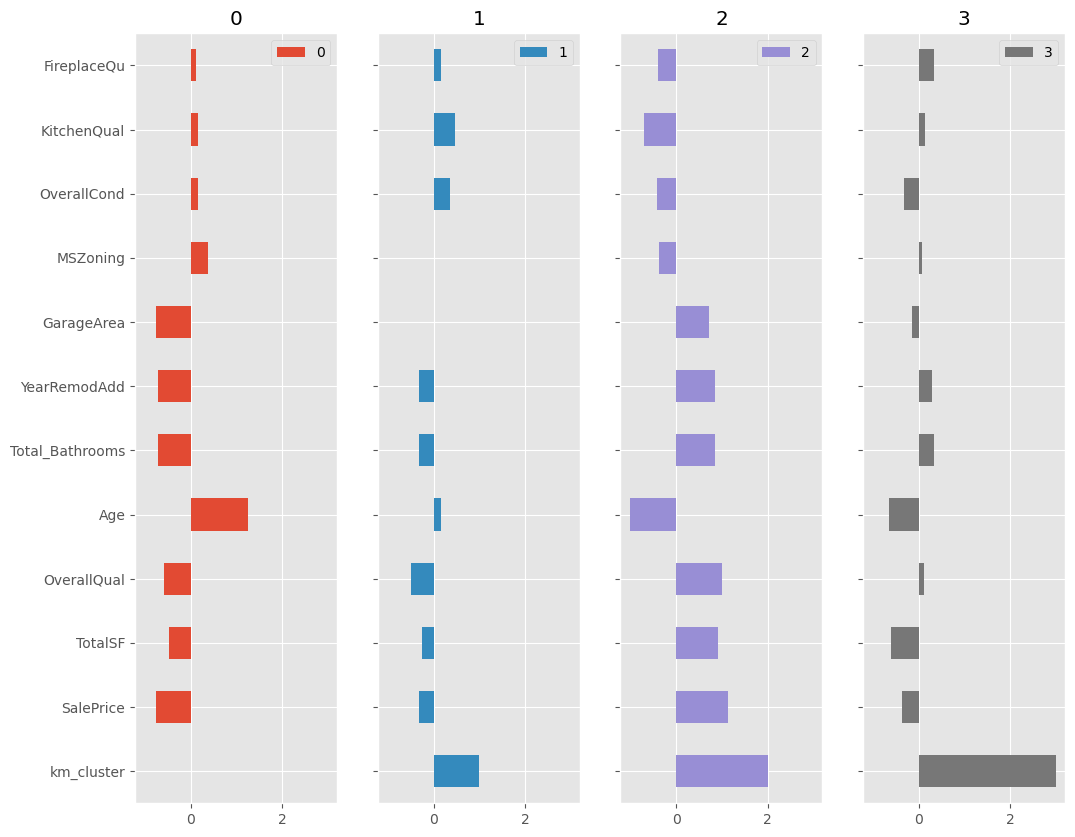

In [140]:
cluster_mean.plot(figsize=(12,10), kind='barh', subplots=True, layout=(1,4), sharey=True)

In [141]:
from sklearn.decomposition import PCA

In [142]:
pca = PCA(n_components=2)
house_pca = pca.fit(train_scaled).transform(train_scaled)

In [143]:
house_pca

array([[ 4.25512334,  0.1843516 ],
       [ 1.75232898, -0.06356999],
       [-0.72216844,  2.52874802],
       ...,
       [ 3.18461375,  5.15361598],
       [-2.1636846 , -1.04425531],
       [ 0.55059827, -0.76195798]])

In [144]:
house_pca_df = pd.DataFrame(house_pca)
house_pca_df.columns = ["pca1", "pca2"]

In [145]:
train_scaled_df = pd.concat([train_scaled_df, house_pca_df], axis=1)

In [146]:
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log,km_cluster,pca1,pca2
0,-0.079518,-0.070268,0.227452,0.535930,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,1.009011,-0.347338,-1.120863,0.496063,2.015368,0.497756,1.045905,2,4.255123,0.184352
1,-0.937290,-0.070268,1.157129,1.057009,0.04897,0.567761,0.288688,0.0,-0.849553,-0.193319,...,0.510213,-0.347338,-0.279567,0.425407,0.883839,0.497756,0.645889,1,1.752329,-0.063570
2,0.134925,-0.070268,-0.082440,1.034353,0.04897,-1.781983,0.288688,0.0,-2.199792,-0.193319,...,-0.256460,-0.347338,1.661884,0.339611,-0.247691,0.497756,-0.102935,1,-0.722168,2.528748
3,-0.293961,1.235149,-0.640247,-0.519821,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,-0.443048,-0.347338,1.208879,0.765226,-0.247691,0.497756,-0.318910,0,-2.509150,4.618522
4,2.708239,-0.070268,-0.702225,0.069225,0.04897,0.567761,0.288688,0.0,-2.199792,-0.193319,...,-0.662889,-0.347338,0.950018,-0.341708,-0.247691,0.497756,-0.596042,1,-2.469829,-0.506920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,-0.937290,-2.681101,0.041517,0.105474,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,0.574872,2.879043,-1.120863,0.287461,0.883839,0.497756,0.700982,2,3.319031,-0.766342
832,-0.079518,-0.070268,0.041517,0.294421,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,0.390131,-0.347338,-1.023791,0.553260,0.883839,0.497756,0.540697,2,2.739336,1.368819
833,0.134925,-0.070268,0.289431,0.804172,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,2.080506,2.879043,0.950018,2.053846,-0.247691,0.497756,1.753834,2,3.184614,5.153616
834,-0.937290,-0.070268,0.413388,1.110023,0.04897,0.567761,0.288688,0.0,0.500687,-0.193319,...,-0.217203,-0.347338,0.658801,-0.193668,-0.247691,0.497756,-0.059483,1,-2.163685,-1.044255


In [147]:
my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


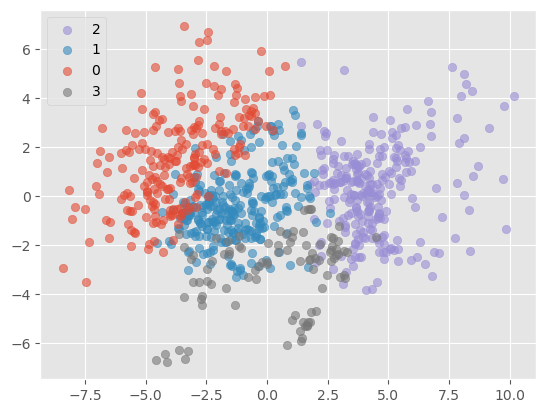

In [148]:
for cl in train_scaled_df['km_cluster'].unique():
    plt.scatter(train_scaled_df.loc[train_scaled_df["km_cluster"]==cl, 'pca1'],
                train_scaled_df.loc[train_scaled_df['km_cluster']==cl, 'pca2'],
                label=cl, c=my_colors[cl], alpha=0.6
                ) 
plt.legend()
plt.show()

In [149]:
pca_comp_df = pd.DataFrame(pca.components_, columns=train_scaled_df.drop(["km_cluster", "pca1", "pca2"], axis=1).columns).T
pca_comp_df.columns = ['pca1', 'pca2']

In [150]:
pca_comp_df

,pca1,pca2
MSSubClass,0.054690,-0.142797
MSZoning,-0.088180,0.003031
LotFrontage,0.029079,0.190617
LotArea,0.026763,0.228522
Street,0.012698,0.010759
...,...,...
Age,-0.223254,0.185294
TotalSF,0.206622,0.211440
Total_Bathrooms,0.197905,0.013478
hasPorch,0.103070,0.059269


## 4.12 추가 분석 2 : 고급 주택의 조건을 분석하고 시각화 

<Axes: ylabel='Frequency'>

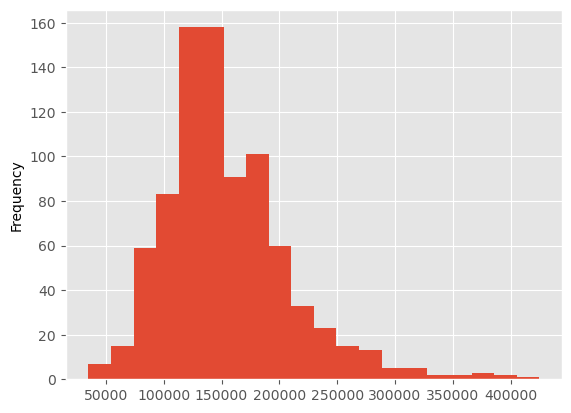

In [151]:
train_df_le['SalePrice'].plot.hist(bins=20)

In [152]:
train_df_le['SalePrice'].describe()

count       836.000000
mean     153882.184211
std       54162.428340
min       34900.000000
25%      119500.000000
50%      143625.000000
75%      180000.000000
max      424870.000000
Name: SalePrice, dtype: float64

In [153]:
train_df['SalePrice'].quantile(0.9)

278000.0

In [154]:
train_df_le.loc[train_df["SalePrice"] >= 278000, "high_class"] = 1

In [155]:
train_df_le["high_class"] = train_df_le["high_class"].fillna(0)

In [156]:
train_df_le.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log,high_class
0,1,60,3,65.0,8450,1,3,3,0,4,...,8,4,208500.0,0,5,2566.0,4.0,1,12.247694,0.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,8,4,181500.0,0,31,2524.0,3.0,1,12.109011,0.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,8,0,140000.0,0,91,2473.0,2.0,1,11.849398,0.0
8,9,50,4,51.0,6120,1,3,3,0,4,...,8,0,129900.0,0,77,2726.0,2.0,1,11.774520,0.0
9,10,190,3,50.0,7420,1,3,3,0,0,...,8,4,118000.0,0,69,2068.0,2.0,1,11.678440,0.0


In [159]:
from sklearn import tree
import pydotplus
from six import StringIO

In [163]:
tree_x = train_df_le[["TotalSF", "OverallQual", "Age", "GrLivArea", "GarageCars", 
                      "Total_Bathrooms", "GarageType", "YearRemodAdd", "GarageArea", "CentralAir",
                      "MSZoning", "OverallCond", "KitchenQual", "FireplaceQu", "1stFlrSF"]]
tree_y = train_df_le["high_class"]

In [164]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(tree_x, tree_y)


In [168]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=tree_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

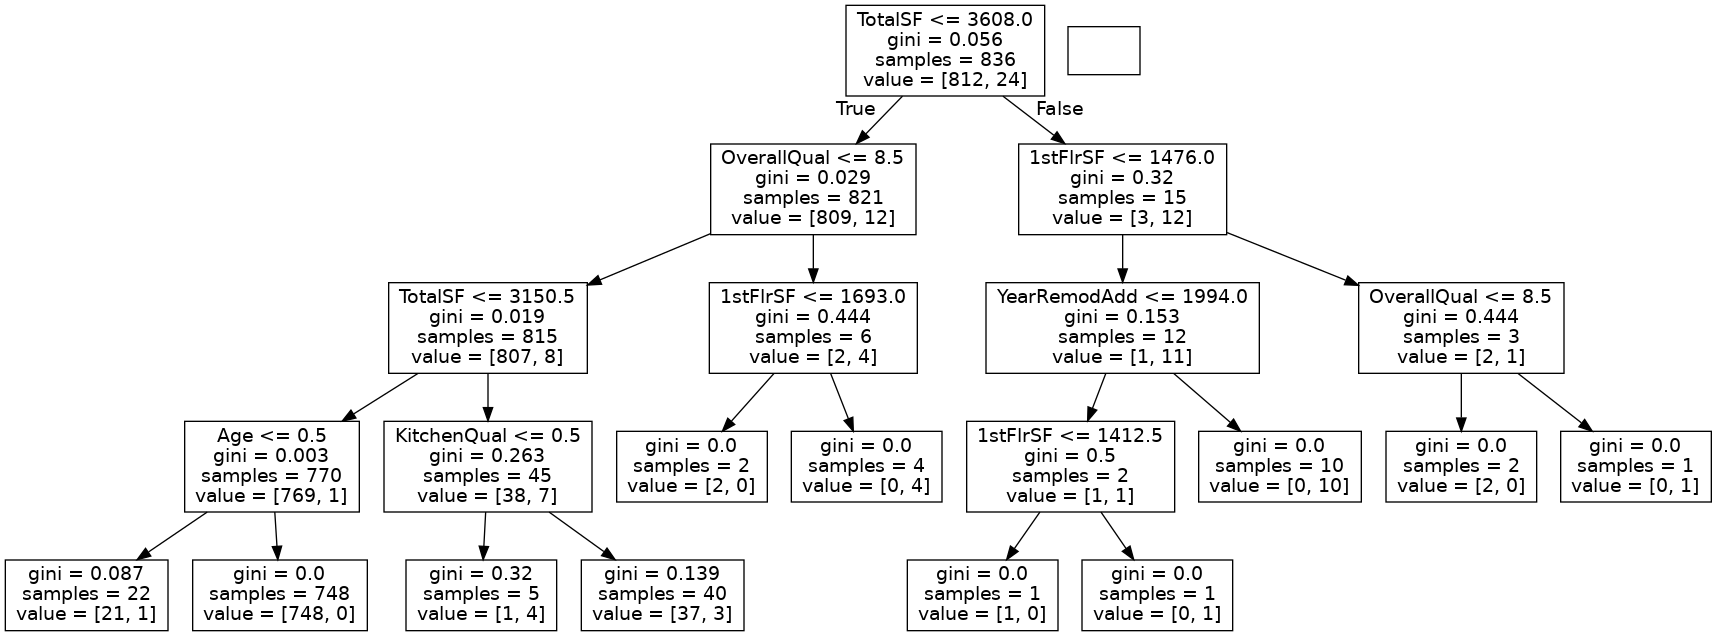

In [171]:
from IPython.display import Image
Image(graph.create_png())